# Wine Quality Analysis and Modelling
<div><a class="badge-base__link LI-simple-link" href="https://ng.linkedin.com/in/oshim-amaechi?trk=profile-badge">Oshim Amaechi Henry</a></div>

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPEtVnpXmXTroYncQt7u8SqCiKpMLgoG1Mmw&usqp=CAU)

According to Wikipedia, wine is an alcoholic drink typically made from fermented grapes. Yeast consumes the sugar in the grapes and converts it to ethanol and carbon dioxide, releasing heat in the process. Different varieties of grapes and strains of yeasts are major factors in different styles of wine.

In most gatherings all over the world, wine is an important freshment item. In Africa precisely, wine is afforded to visitors to show they are welcomed. This why one is likely to find some form of wine in reservation in every home. These reservations are to avoid inability to offer drinks to ones visitors in cases where they come unplanned.

Due to this cultural trend, competitions exist among the numerous sellers that warrant the deployment of different marketing strageties - sometimes decitful - in order to beat the competition. As a result of this, buyers don't get the values they seek.

## Problem Statement

In this notebook, two wine types were analyzed based on their contents to see how a particular quality differ from the rest. The model that predicts the quality of wine of these two types are built. 

## The Dataset

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: http://www.vinhoverde.pt/en/ or the reference [Cortez et al., 2009].

Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

Wines are made up of the different components for their preparations. Some class of wines have almost the same components but may not have them in the same amounts. It is on this idea that this project is built upon. For uniformity, the components that make upon the wine understudy here will be referred to as **features**, **variables** or **attributes**. The samples collected to make up the dataset will be called **observations** or **instances**. The columns represent the attributes and the rows represent the instances. This makes because in picking any observation, one can see the quantities of the atteibutes it contains.

To start off, the required libraries are imported below.

In [1]:

# data manipulation libraries
import numpy as np
import pandas as pd
import statistics as st

# data visualization libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno

# data modelling libraries
from sklearn.preprocessing import LabelBinarizer, OrdinalEncoder,MinMaxScaler,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import train_test_split,HalvingGridSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline


import jovian 

# setup of plot figures
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data Preparation

First, the datasets are loaded, inspected, cleaned and set up for the first stage of the project - analysis.

In [2]:
# reading of the two datasets
df1 = pd.read_csv('winequality-red.csv', sep=';')
df2 = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
# printing of the different feature names of the two datasets
df1_col = df1.columns.to_list()
df2_col = df2.columns.to_list()

print(df1_col,'\n')

print(df2_col)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality'] 

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


The two datasets consist of the same features for different wine types: red wine and white wine. Both wine types were parsed with pandas' I/O API, `read_csv()` function and were stored seperatly within the variables `df1` and `df2` respectively. 

Since the datasets lap in features, it will make sense to concatinate them so as to make it easier for analysis. But to do this, a new feature will be introduced in each of the datasets to serve as observation identifications in the concatinated dataframe.

Below is a cell of codes where the column bearing the wine types named `wine type` is defined along with the concatination syntax and other refining methods to reorganise the two dataframes into a single dataframe.

In [4]:
# assignment of id labels to the two different datasets
df1['wine type'] = 'Red Wine'
df2['wine type'] = 'White Wine'

# concatination of the datasets
df = pd.concat([df1,df2])
df = df.sample(frac=1.0,random_state=7).reset_index(drop=True)
df.tail()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
6492            6.3             0.290         0.23            14.2      0.037   
6493            7.6             0.220         0.34             9.7      0.035   
6494            8.1             0.825         0.24             2.1      0.084   
6495           10.9             0.320         0.52             1.8      0.132   
6496            7.0             0.150         0.30            13.3      0.049   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
6492                 24.0                  99.0  0.99528  3.08       0.38   
6493                 26.0                 143.0  0.99650  3.08       0.49   
6494                  5.0                  13.0  0.99720  3.37       0.77   
6495                 17.0                  44.0  0.99734  3.28       0.77   
6496                 46.0                 120.0  0.99704  3.20       0.36   

      alcohol  quality   wine type  
6492     10.6        6  White Wine  
6493      9.8        6  White Wine  
6494     10.7        6    Red Wine  
6495     11.5        6    Red Wine  
6496      9.5        7  White Wine

The above display shows the last five observations of the dataframe. The last column of the dataframe represents the wine type a particular observation represents.

Having got the dataset ready, some cleaning and investigations will be done to get rid of errors and uncover meanful insights.

The dataframe, will be investigated quantitatively and qualitatively. In the quantitative investigation, the aim is to know how the dataset is structured in terms of features and observations, data types of the feature to make sure the values are workable etc whereas the qualitative investigation tries to look at csrefullness in the data collection.

### Quantitative Investigation

The quantitative investigation is grouped into three, namely: structural investigation, categorical investigation and numerical investigation.

#### Structural Investigation

Here, the shape of the dataframe is examined that is, the number observations is checked along with the number of features contained in the data set. Also, the data types of the features are looked at to make sure there are in their supposed types for easy operability.

To get the shape, pandas' `shape` method is applied to the dataframe. This function returns a tuple containing two values with the first value representing the total number of observations while the last value represents the total number of features. The data types are returned when the function `info()` is applied to the dataframe. Along with the data types are the index numbering and the non-Null Count which shows the non-null value count for each feature.

In [5]:
print(f'The dataset consists of {df.shape[0]} observations and {df.shape[1]} features')

The dataset consists of 6497 observations and 13 features


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


From the output above, all the features are made up of `float64` data types apart from `quality` and `wine type` which are made up of `int64` and `object` data types respectively. The non-null value counts are complete for feature.

#### Categorical Investigation

This is where the `object` data type is looked into. Fortunately, the `object` data type in the dataframe is the one introduce to differentiate between the two wine types. There is really nothing to see apart from how the dataframe is shaped with respect to these wine types.

In the cell below, this `object` feature is selected alone and the cell after it carries a code block that changes the type from `object` to `string`. This will help in applying python's string methods to this feature.

In [7]:
df.select_dtypes(exclude='number').head()

wine type
0    Red Wine
1  White Wine
2  White Wine
3  White Wine
4    Red Wine

In [8]:
df['wine type'] = df['wine type'].astype('string')

In the cell below, The unique values of the `wine types` are used to determine how many of the total observations belong to the different wine types.

In [9]:
cat_feature_count = df['wine type'].value_counts()
cat_feature_count

White Wine    4898
Red Wine      1599
Name: wine type, dtype: Int64

As can be seen above, the dataframe consists of $4,898$ white wine and $1,599$ red wine instances. This means that majority of the observations are made up of white wine instances. 

The values are plotted in the bar chart below.

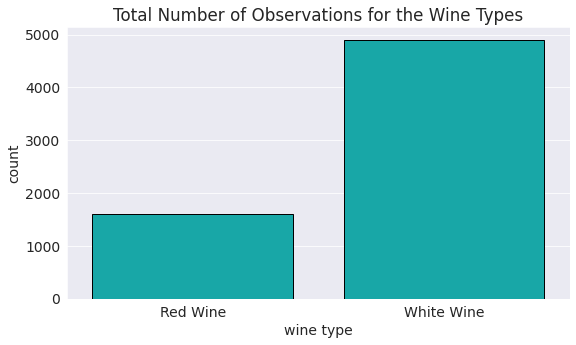

In [10]:
plt.title('Total Number of Observations for the Wine Types')
sns.countplot(x=df['wine type'],color='c', edgecolor='black');

#### Numerical Inestigation

The entire dataset consists of numerical features. Here, these features are looked at to see their statistical characteristics. These characteristics will give insight of what the respective features are made up of.

To get started, pandas' function, `describe()` is used to get the statistics summary of the different features in terms of their counts (non-null counts), means, standard deviations, minimum values, first quartiles, second quartiles (medians), third qurtiles and maximum values. In addition to giving insight to the characteristics, the statistics summary may also show if there are abnormal values within the dataset, that is values that differ from the rest.

In [11]:
df.describe().T

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000

The summary above provides an overview of each feature. The content should differ from one wine type to another and from one quality group to the other. These differences will be looked into during the indepth analysis. From the summary, some of the instances do not contain citric acid and the maximum chloride content is $0.611$. Important to note is that the wine quality number from $3$ to $9$.

Having looked at the statistics summaryof tye dataset, it is equally important to look at the unqiue values of the respective features. In the cell below, the unique values of the features were counted. More than half of the features have below $200$ uniques values and the rest have higher than that. In the cell that comes after, the unique value counts is plotted in a bar chart to further view the pictorial depiction of these unique values per feature.

In [12]:
unique_values = df.select_dtypes(include='number').nunique().sort_values()
unique_values

quality                   7
citric acid              89
fixed acidity           106
pH                      108
sulphates               111
alcohol                 111
free sulfur dioxide     135
volatile acidity        187
chlorides               214
total sulfur dioxide    276
residual sugar          316
density                 998
dtype: int64

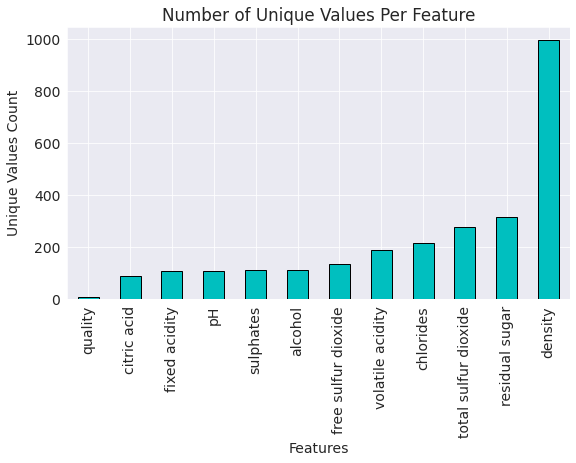

In [13]:
unique_values.plot(kind='bar', color='c',edgecolor='black',title='Number of Unique Values Per Feature', xlabel='Features', ylabel='Unique Values Count');

## Qualitative Investigation

In this section, the quality of the dataset is examined to see if there are error values and duplicated values in the dataset.

### Null Values

Error,missing or invalid values are represented in pandas with the value `NaN`. To see these values from the dataset, pandas' `isnull()` function which returns boolean values; `True` where there is an invalid value and `False` otherwise. To make it easier to count, python's ability to evaluate `False` to $0$ and`True` to $1$ leveraged. So, to get the total number of null values, the values returned by `isnull()` for each feature is summed up.

In [14]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine type               0
dtype: int64

The output above confirms what was seen during the quantitative investigations; both `info()` and `describe()` returned a complete count for each feature. This means that there are no missing values in the dataset. Next will be to check for duplicated values.

### Duplicated Instances

Here, the dataset is checked for duplicated instances. Duplicates can occur during data collection. Pandas' `duplicated()` is a similiar function to `isnull()` in the sense that it returns boolean values in such a way that a repeated observation holds the value `True` and `False` otherwise. These values can be summed too to return the total number of repeated observations. The procedure follows in the next cell.

In [15]:
duplicates = df.duplicated().sum()
print(f'The dataset contains {duplicates} instances.')

The dataset contains 1177 instances.


Having duplicated observations is normal. In this case, the number of duplicated observations in relation to the number of observations in the two concatinated dataframes is quite much. It is not a good practice to include duplicated observations in analysis. Therefore, the duplicated observations will be excluded from the dataset. Also, the shapes of the sub dataframes will be examined to know how they have been affected.

In the following cell, pandas' `drop_duplicates()` is used to exclude the duplicated observations. A keyword - `keep` is used to keep the first of the instance repeated and drop the rest.

In [16]:
# drop the duplicated  observations
df = df.drop_duplicates(keep='first')
df.reset_index(drop=True,inplace=True)

# check the left observations for the two datasets
red_wine = df[df['wine type'] == 'Red Wine'].shape[0]
white_wine = df[df['wine type'] == 'White Wine'].shape[0]

print('After dropping the duplicated values, the red \n'
      f'wine and white wine has {red_wine} and {white_wine} instances \n' 
      'left respectively.')

After dropping the duplicated values, the red 
wine and white wine has 1359 and 3961 instances 
left respectively.


The duplicated instances seem to have been equally distributed among the two wine types. 

The above concludes the different investigations. Left to conclude this section is data engineering.

### Feature Engineering

This is where the _target variable_ is modified so as to made it easy for modelling. The quality of the wine types will be classified as either low, medium or high given the features. To help with this grouping is the quality feature contained in the dataset.

In the following cell, `quality` is examined seperately for the two respective wine types.

In [17]:
# select the different wine types
wine_red = df[df['wine type'] == 'Red Wine']
wine_white = df[df['wine type'] == 'White Wine']

# check the range of quality values for each
red_quality = wine_red['quality'].unique()
white_quality = wine_white['quality'].unique()
red_quality.sort()
white_quality.sort()

print(red_quality)
print(white_quality)

[3 4 5 6 7 8]
[3 4 5 6 7 8 9]


The lowest quality value for the both wine types are the same while their highest quality values differ. Next is to look at how the quality values are distributed within the dataset.

In [18]:
quality = df['quality'].value_counts(ascending=True)
quality

9       5
3      30
8     148
4     206
7     856
5    1752
6    2323
Name: quality, dtype: int64

Below, the values are plotted in a bar chart.

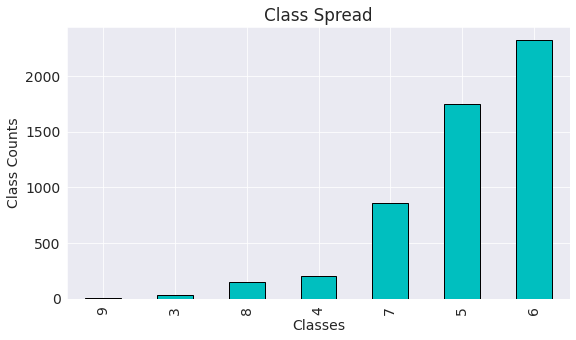

In [19]:
quality.plot(kind='bar', color='c', edgecolor='black', title='Class Spread', xlabel='Classes', ylabel='Class Counts');

To strike a level of balance with the spread of the quality values above, the quality label will be flagged as follows:

- All wine qualities of values $3$ and $4$ will be flagged as low quality.
- All wine qualities of values $5$ and $6$ will be flagged as medium quality.
- All wine qualities of values from $7$ and higher will be flagged as high quality.

In the following cell of codes, the numpy's function - `where()` is used to create the quality flags which is assigned to `quality flag` in the existing dataframe.

In [20]:
df['quality flag'] = np.where((df['quality'] == 3) | (df['quality'] == 4), 'Low',
                              np.where((df['quality'] == 5) | (df['quality'] == 6), 'Medium',
                                       'High'))

Having done that, the next line of codes is used to check the percentage composition of the dataframe by quality flag.

In [21]:
df['quality flag'].value_counts()*(100/df.shape[0])

Medium    76.597744
High      18.966165
Low        4.436090
Name: quality flag, dtype: float64

## Exploratory Analysis

The dataset has been cleaned and prepared for deeper exploration. Three types of analytics methods will be used to explore the dataset. As this is going on, analytic questions were be answered as well. The three methods are univariate analysis, bivariate anaylsis and multivariate analysis.

### Univariate Analysis

This type of anaylsis involves looking at the different features one after the other to understand their respective distributions. To accomplish this, different analytics tools will be used such as bar chats and histograms. Bar charts are used to plot categorical data while histograms are used to plot the distributions of the numerical data.

The first feature to consider is the quality flag. The aim is primarily to know how may features belong to each category of the quality flag.

In [22]:
quality_count = df['quality flag'].value_counts().sort_values()
quality_count

Low        236
High      1009
Medium    4075
Name: quality flag, dtype: int64

The majority of the observations are medium quality wine types. Very few make up the low quality flag. The bar chart below provides a pictorial view of the quality flag.

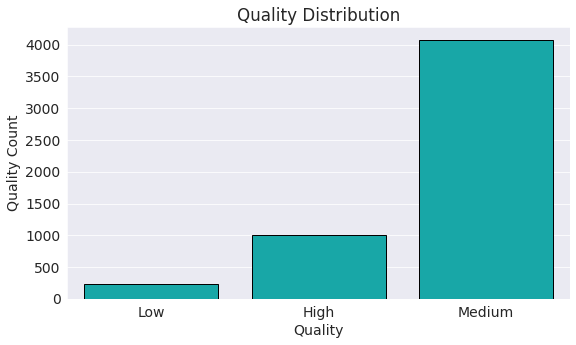

In [23]:
quality_count_df = quality_count.to_frame()
plt.xlabel('Quality')
plt.title('Quality Distribution')
sns.barplot(x=quality_count_df.index,y=quality_count_df['quality flag'],edgecolor='black',color='c')
plt.ylabel('Quality Count');

Next are the distribution plots of the rest of the features. The distributions are plotted with the aid of the histograms as mentioned earlier. 

***** Features' Distribution Plots *****


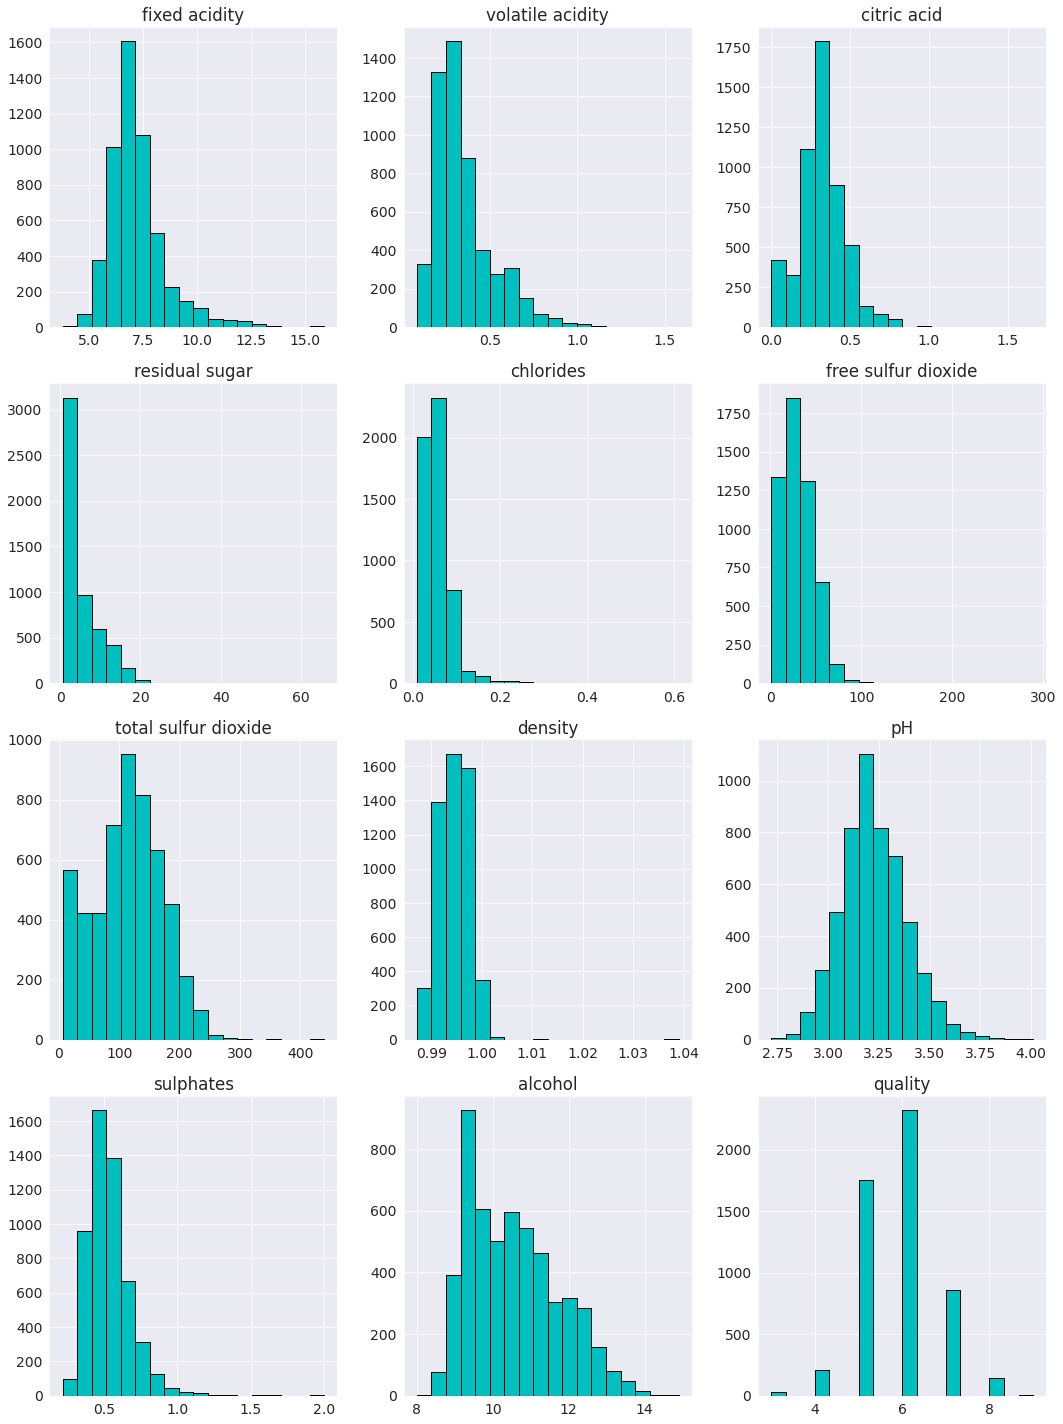

In [24]:
print('***** Features\' Distribution Plots *****')
df.hist(bins=18, layout=(-1,3), figsize=(15,20),color='c',edgecolor='black')
plt.tight_layout()

The data are normally distributed with majority skewed to the right. These skewnesses confirm the presence of outliers as is stated in the datasets' discriotion. To have a better view of the outliers, the features will be plotted using box plots. Plotting the box plots of each of the features will be a daunting task. To reduce the stress, the plots will be done using the function defined below.

In [25]:
def box_plot(df,col_list,n,m,x,y):
    '''box_plot takes a data frame and a list of feature names 
    and plots their box plots'''
    fig,axes = plt.subplots(n,m,figsize=(x,y))
    a = list(np.arange(n))
    b = list(np.arange(m))
    c = []   
    for i in col_list:
        for j in a:
            for k in b:
                c.append((i,j,k))
                
    d = list(np.arange(len(c)))
    for l in d:
        if l % (len(col_list)+ 1) == 0:
            axes[c[l][1],c[l][2]].set_title(f'Box Plot of {c[l][0]}')
            sns.boxplot(x=df[c[l][0]],color='c',ax=axes[c[l][1],c[l][2]])
            plt.tight_layout(pad=2)


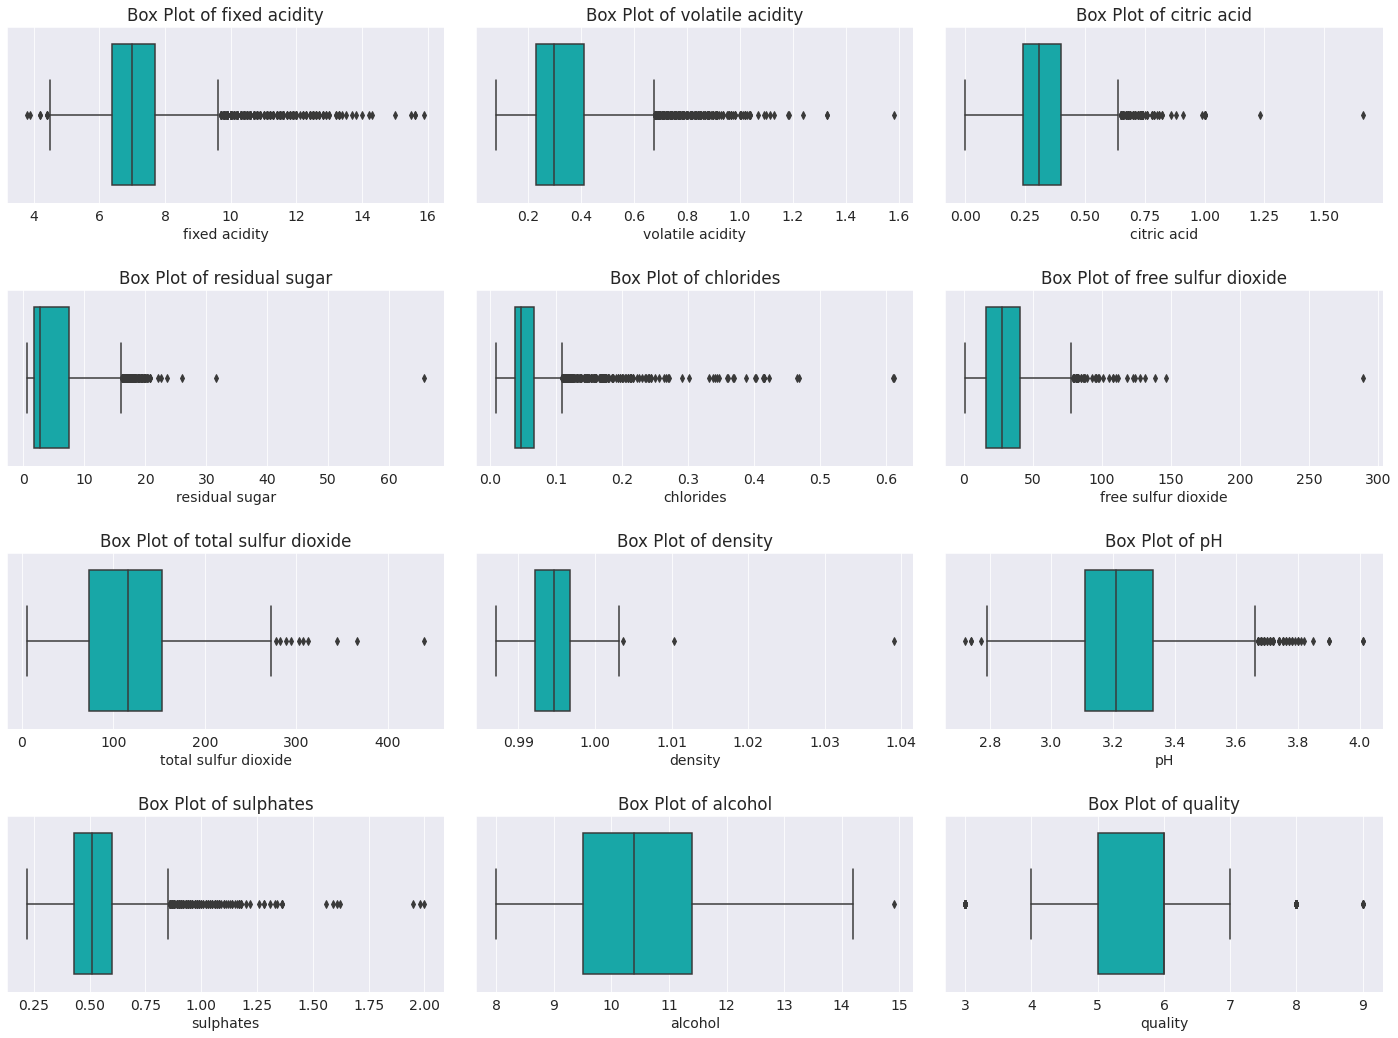

In [26]:
num_columns = df.columns.to_list()
num_columns.remove('wine type')
num_columns.remove('quality flag')
box_plot(df,num_columns,n=4,m=3,x=20,y=15)

The outliers are the black dots outside the whiskers of the box plots. Outliers are either error points due to factors like malfunctions of the measurement instruments or actual data point that are not usually common in practice. They known to affect model accuracy and as a result should be handled. They can be accommodated or excluded. Whether to accommodate or exclude the depends on what is known about them and the dataset. However, due to the information in description and the number of observations, the outliers will be accommodated before modelling. 

The box plots concludes the univariate analysis. Next is the bivariate analysis.

### Biavariate Analysis

In bivariate analysis, the goal is to see how two features relate to each other. Box plots, bar charts and scatter plots are the tools for this analysis. Due to the number of features present, the plottings will be done using the functions that are defined in this subsection. The first function plots the relationship between the categorical features and the numerical features first of which is the wine quality flag and the numerical features.

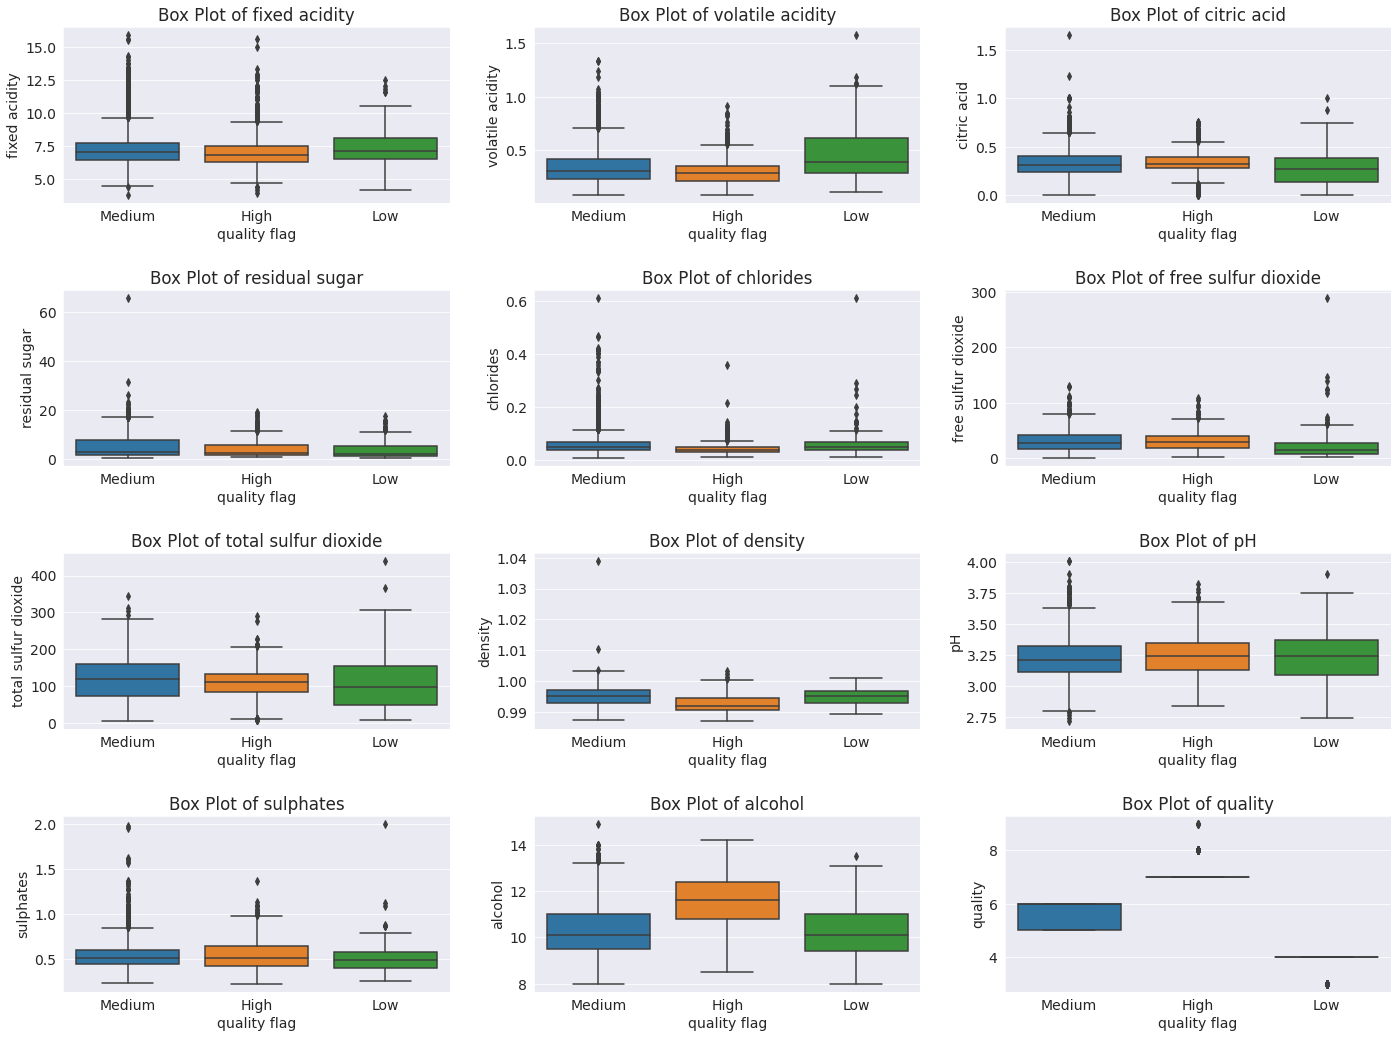

In [27]:
def box_plot_(df,col_list,t_feat,n,m,x,y):
    '''box_plot takes a data frame and a list of feature names 
    and plots their box plots'''
    fig,axes = plt.subplots(n,m,figsize=(x,y))
    a = list(np.arange(n))
    b = list(np.arange(m))
    c = []   
    for i in col_list:
        for j in a:
            for k in b:
                c.append((i,j,k))
                
    d = list(np.arange(len(c)))
    for l in d:
        if l % (len(col_list)+ 1) == 0:
            axes[c[l][1],c[l][2]].set_title(f'Box Plot of {c[l][0]}')
            sns.boxplot(x=df[t_feat],y=df[c[l][0]],ax=axes[c[l][1],c[l][2]])
            plt.tight_layout(pad=2)
        
box_plot_(df,num_columns,t_feat='quality flag',n=4,m=3,x=20,y=15)


In the plots above is the visualization of how the wine qualities differ by common statistical central tendency measures such as median, interquartile range etc. From the graph, high quality wines tend to have higher alcohol and lower density interquartile ranges compared to low and medium quality wines. This will warrant the study of how the wine qualities are explained by the features using popular statistical measures. 

Having seen the above, it is equally important to see how the features explain the different wine types.

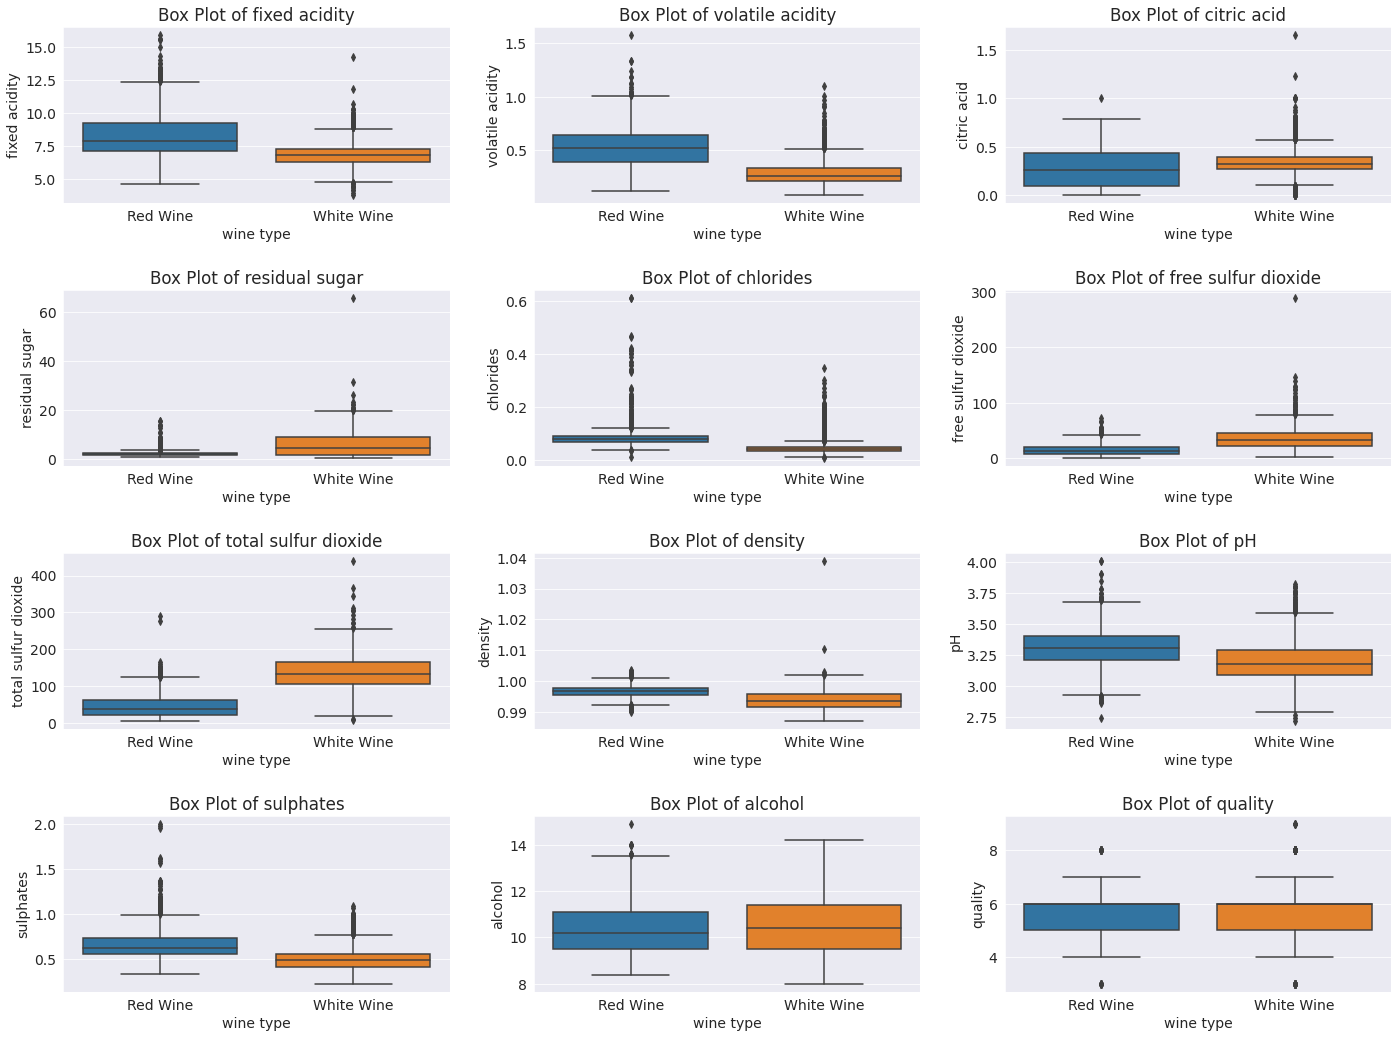

In [28]:
box_plot_(df,num_columns,t_feat='wine type',n=4,m=3,x=20,y=15)

From the above charts, it is obvious that only `acohol` tend to explain the wine types equally while the rest contain varying ranges of the rest of the features. The differences that have been seen so far will lead to the first question of the analysis.

**Q1: How does the features explain the wine types by their:**
1. average values?
2. minimum values?
3. maximum values?

To answer this grouped question, the dataframe is grouped by `wine type` and aggregated by `mean()`, `min()` and `max()` functions. These functions return the mean values, minimum values and maximum values of the different features for the different wine types. The values returned by the different functions for the different wine types were concatinated to form a dataframe showing the average, minimum and maximum values for each wine type for easy comparison. The dataframe was further reorganised and visualized using seaborn's `catplot()` function. The function uses bar charts to show minimum, mean and maximum contents for the different wine types.

In [29]:
# create a dataframe with groupby
wine_type=df.groupby('wine type')[num_columns]

# aggregate by mean, min and max
wine_type_mean = wine_type.mean()
wine_type_min = wine_type.min()
wine_type_max = wine_type.max()

# concatinate all the dataframes
wine_type_summary = pd.concat([wine_type_mean,wine_type_min,wine_type_max],keys= ['Mean','Minimum','Maximum'],names=['measure'])
wine_type_summary

fixed acidity  volatile acidity  citric acid  \
measure wine type                                                  
Mean    Red Wine         8.310596          0.529478     0.272333   
        White Wine       6.839346          0.280538     0.334332   
Minimum Red Wine         4.600000          0.120000     0.000000   
        White Wine       3.800000          0.080000     0.000000   
Maximum Red Wine        15.900000          1.580000     1.000000   
        White Wine      14.200000          1.100000     1.660000   

                    residual sugar  chlorides  free sulfur dioxide  \
measure wine type                                                    
Mean    Red Wine          2.523400   0.088124            15.893304   
        White Wine        5.914819   0.045905            34.889169   
Minimum Red Wine          0.900000   0.012000             1.000000   
        White Wine        0.600000   0.009000             2.000000   
Maximum Red Wine         15.500000   0.611000            72.000000   
        White Wine       65.800000   0.346000           289.000000   

                    total sulfur dioxide   density        pH  sulphates  \
measure wine type                                                         
Mean    Red Wine               46.825975  0.996709  3.309787   0.658705   
        White Wine            137.193512  0.993790  3.195458   0.490351   
Minimum Red Wine                6.000000  0.990070  2.740000   0.330000   
        White Wine              9.000000  0.987110  2.720000   0.220000   
Maximum Red Wine              289.000000  1.003690  4.010000   2.000000   
        White Wine            440.000000  1.038980  3.820000   1.080000   

                      alcohol   quality  
measure wine type                        
Mean    Red Wine    10.432315  5.623252  
        White Wine  10.589358  5.854835  
Minimum Red Wine     8.400000  3.000000  
        White Wine   8.000000  3.000000  
Maximum Red Wine    14.900000  8.000000  
        White Wine  14.200000  9.000000

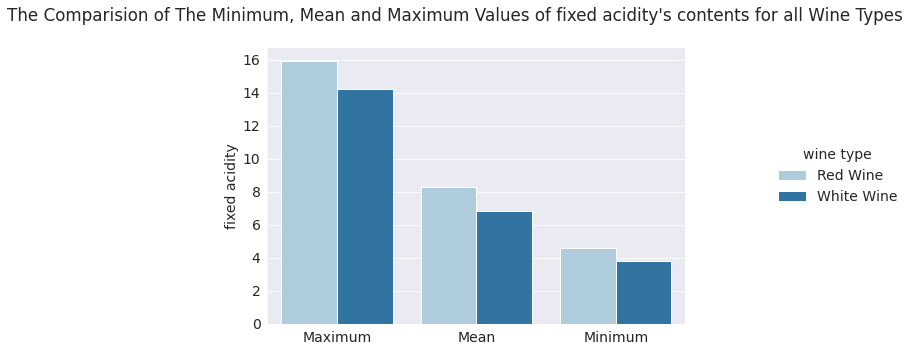

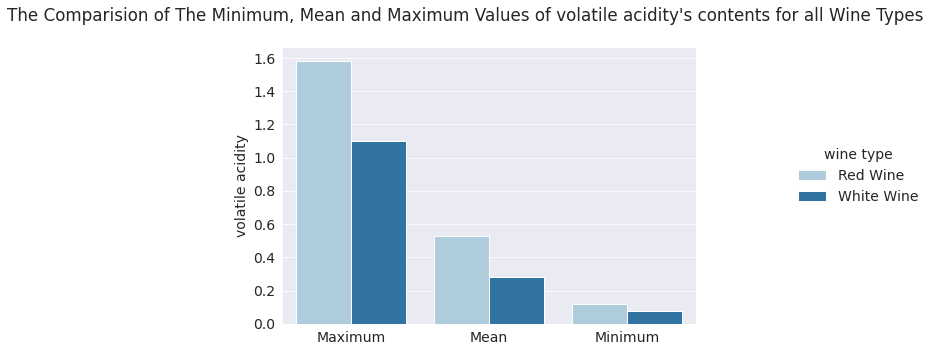

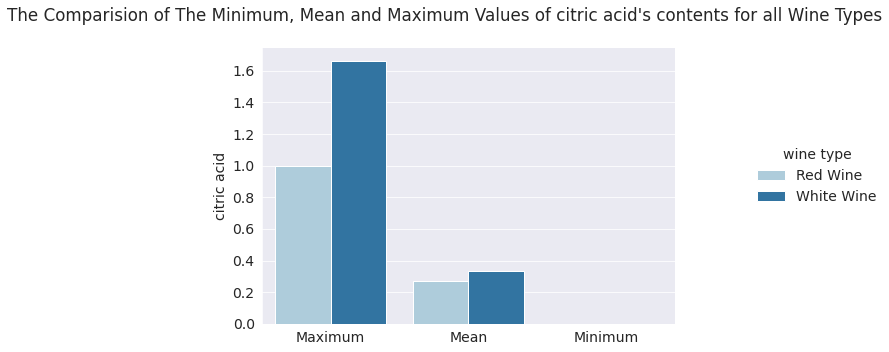

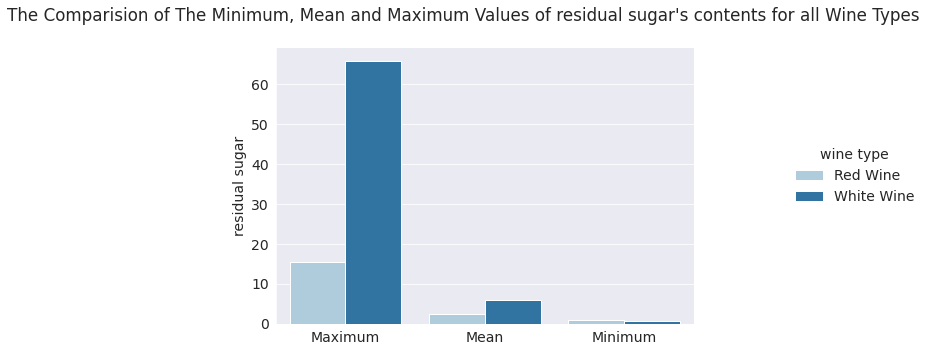

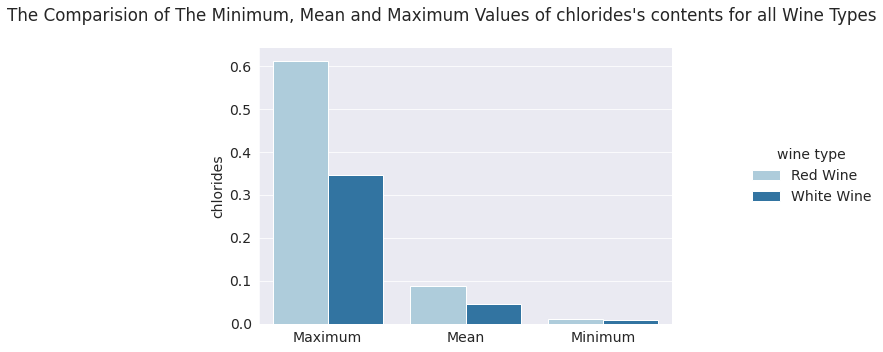

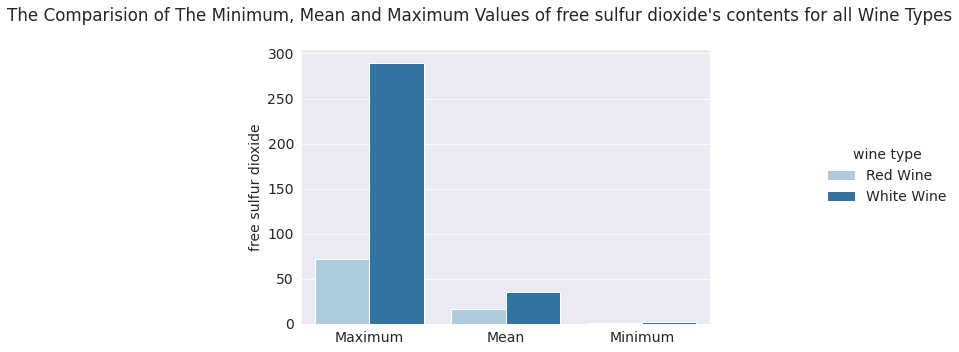

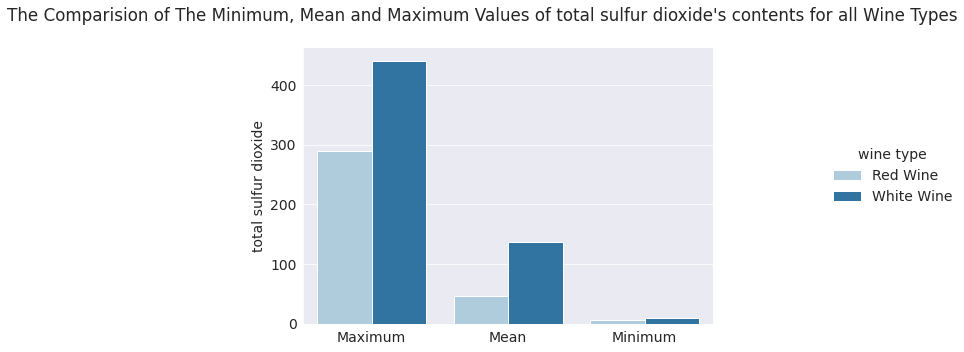

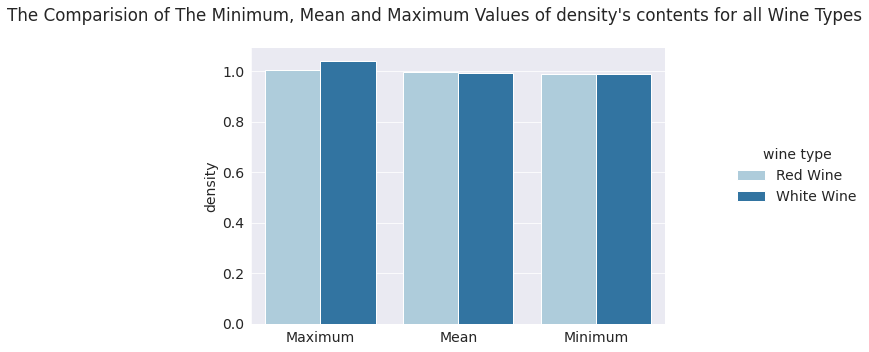

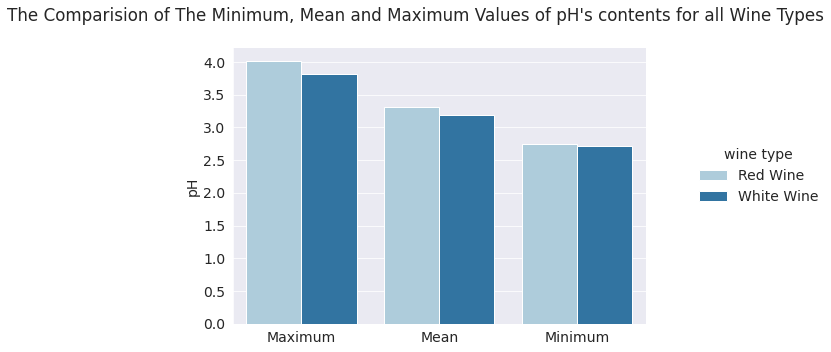

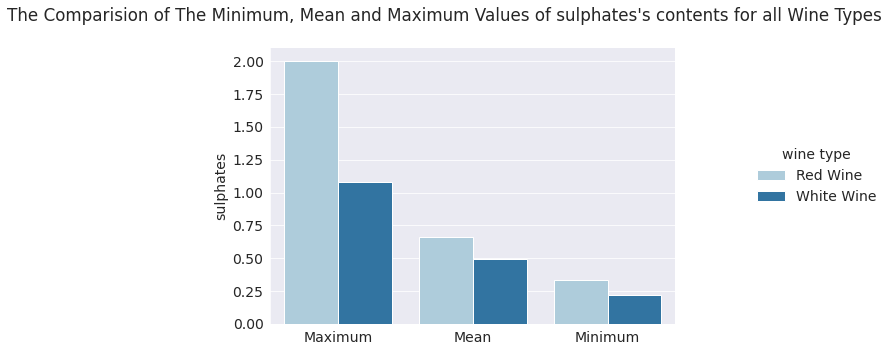

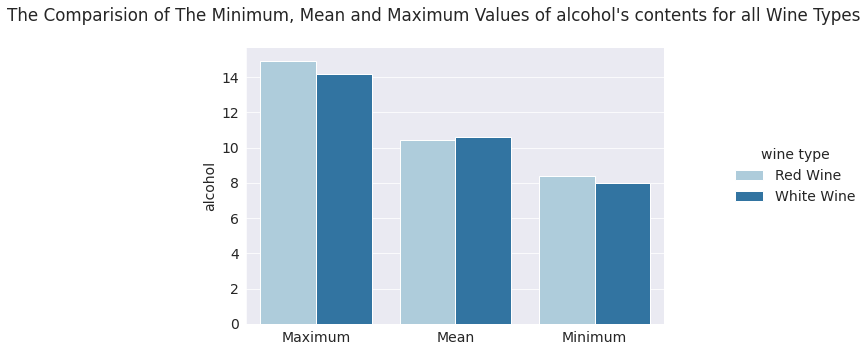

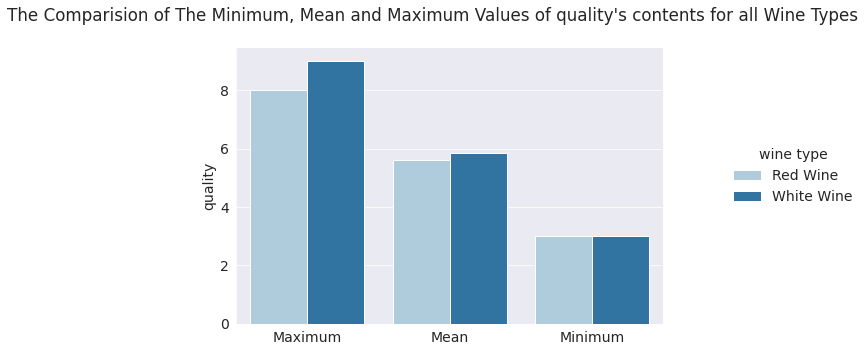

In [30]:
# soften the multi index dataframe
measure = ('Mean','Minimum','Maximum')
wine_type = ('Red Wine','White Wine')
data = {x:wine_type_summary[x] for x in wine_type_summary.columns} 
index = pd.MultiIndex.from_product([measure,wine_type], names=['measure','wine type'])
wine_type_summary_ = pd.DataFrame(data = data, index=index).reset_index()

# plot the softened dataframe with catplot()
for x in wine_type_summary_.columns[2:]:
    f=sns.catplot(x='measure', y=x, hue='wine type', data=wine_type_summary_, kind='bar',order=('Maximum','Mean','Minimum'),palette=sns.color_palette("Paired")) 
    f.set_xlabels('')
    f.fig.suptitle(f'The Comparision of The Minimum, Mean and Maximum Values of {x}\'s contents for all Wine Types')
    plt.tight_layout()

From the charts above, it is clear how each feature explains the a wine types. For instance, the average, minimum and maximum quantities of chlorides present in red wine are greater than those of white wine while the density of the both wine types are almost the same for all wine types.

**Q2: How does the features explain the wine qualities based on their:**
1. average values?
2. minimum values?
3. maximum values?

To answer the above questions, the datsframe is grouped by `quality flag` and aggregated by `mean()`, `min()` and `max()` functions. The values returned by the different functions were concatinated for easy viewing of the average, minimum and maximum values of the features present in the different wine qualities. The dataframe was reorganised also plotted in bar charts using seaborn's `catplot()` function. The bars compare the maximum, mean and minimum content of each wine quality.

In [31]:
# create a dataframe using groupby
quality = df.groupby('quality flag')[num_columns]

# aggregate the dataframe using mean min and max
quality_mean = quality.mean()
quality_min = quality.min()
quality_max = quality.max()

# concatinate the dataframes
wine_quality_summary = pd.concat([quality_mean,quality_min,quality_max],keys=['Mean','Minimum','Maximum'],names=['measure'])
wine_quality_summary

fixed acidity  volatile acidity  citric acid  \
measure quality flag                                                 
Mean    High               7.079237          0.293930     0.336947   
        Low                7.374153          0.469322     0.272712   
        Medium             7.239632          0.349309     0.316577   
Minimum High               3.900000          0.080000     0.000000   
        Low                4.200000          0.110000     0.000000   
        Medium             3.800000          0.080000     0.000000   
Maximum High              15.600000          0.915000     0.760000   
        Low               12.500000          1.580000     1.000000   
        Medium            15.900000          1.330000     1.660000   

                      residual sugar  chlorides  free sulfur dioxide  \
measure quality flag                                                   
Mean    High                4.259118   0.044421            30.453419   
        Low                 4.175424   0.062610            22.733051   
        Medium              5.294491   0.059385            30.356442   
Minimum High                0.800000   0.012000             3.000000   
        Low                 0.700000   0.013000             3.000000   
        Medium              0.600000   0.009000             1.000000   
Maximum High               19.250000   0.358000           108.000000   
        Low                17.550000   0.610000           289.000000   
        Medium             65.800000   0.611000           131.000000   

                      total sulfur dioxide   density        pH  sulphates  \
measure quality flag                                                        
Mean    High                    106.211100  0.992727  3.240684   0.544737   
        Low                     104.125000  0.994921  3.238644   0.507331   
        Medium                  116.642822  0.994961  3.219887   0.532047   
Minimum High                      7.000000  0.987110  2.840000   0.220000   
        Low                       7.000000  0.989200  2.740000   0.250000   
        Medium                    6.000000  0.987220  2.720000   0.230000   
Maximum High                    289.000000  1.003200  3.820000   1.360000   
        Low                     440.000000  1.001000  3.900000   2.000000   
        Medium                  344.000000  1.038980  4.010000   1.980000   

                        alcohol   quality  
measure quality flag                       
Mean    High          11.573175  7.156591  
        Low           10.215042  3.872881  
        Medium        10.315063  5.570061  
Minimum High           8.500000  7.000000  
        Low            8.000000  3.000000  
        Medium         8.000000  5.000000  
Maximum High          14.200000  9.000000  
        Low           13.500000  4.000000  
        Medium        14.900000  6.000000

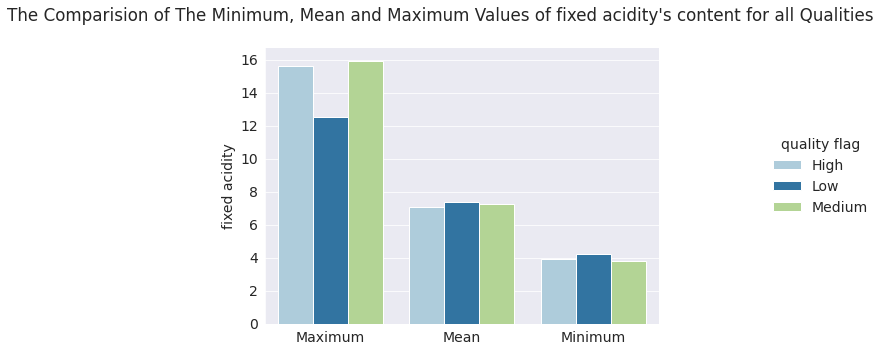

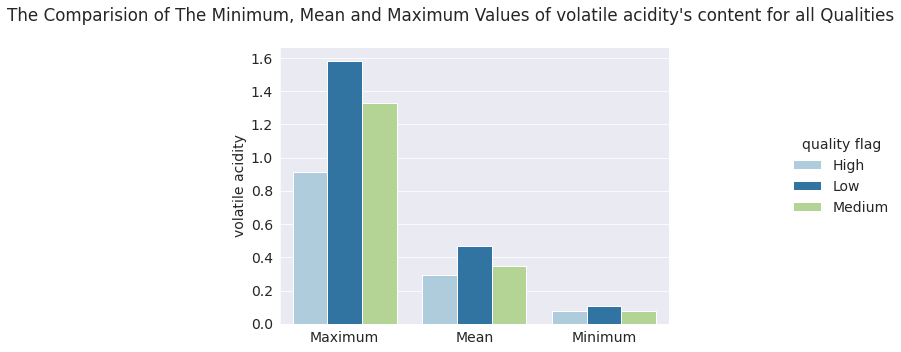

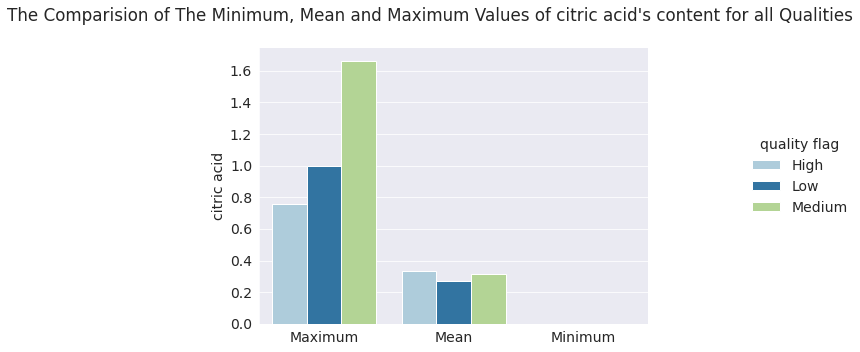

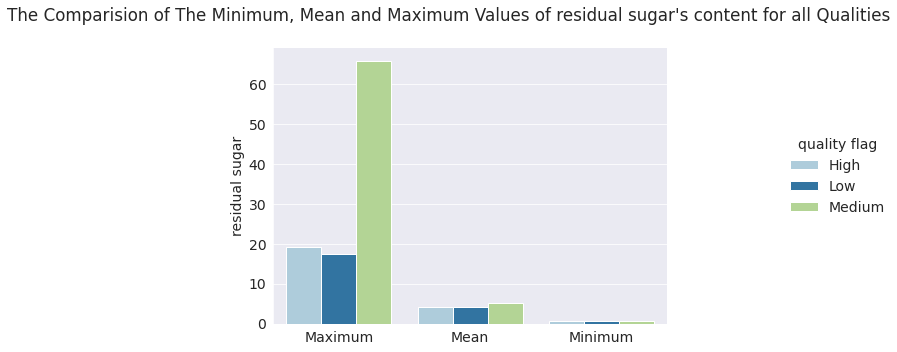

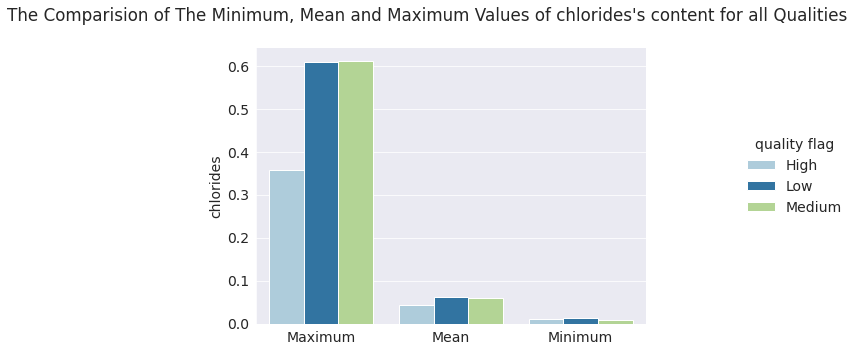

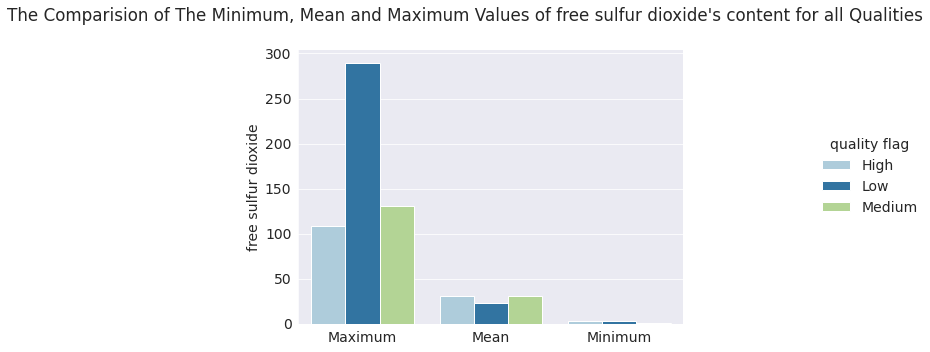

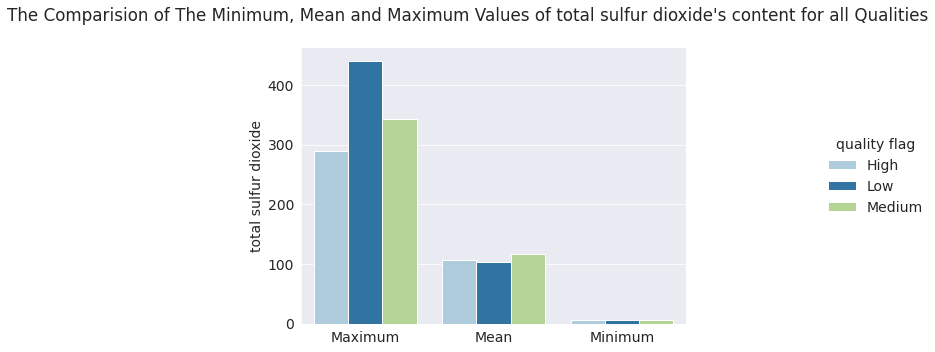

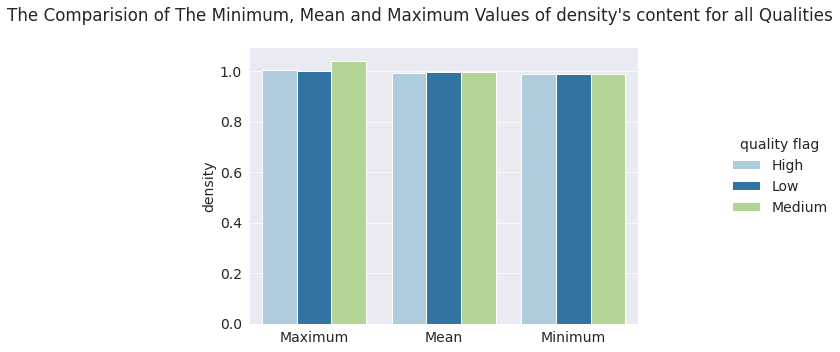

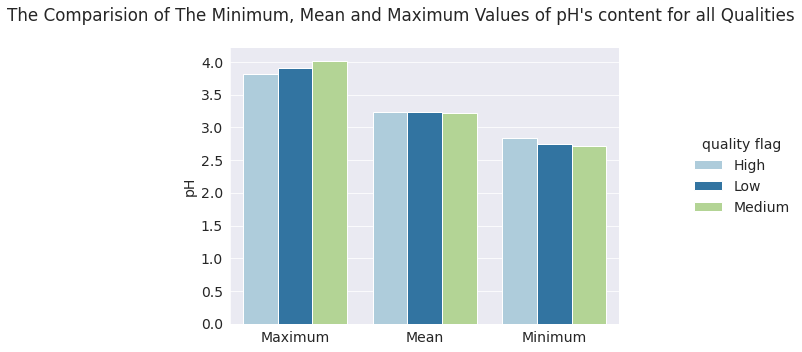

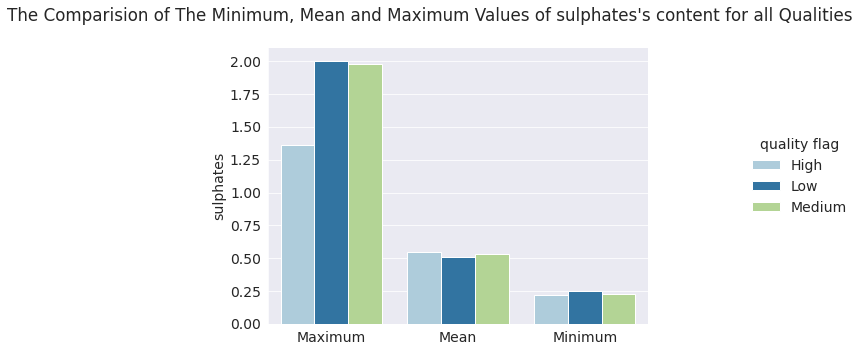

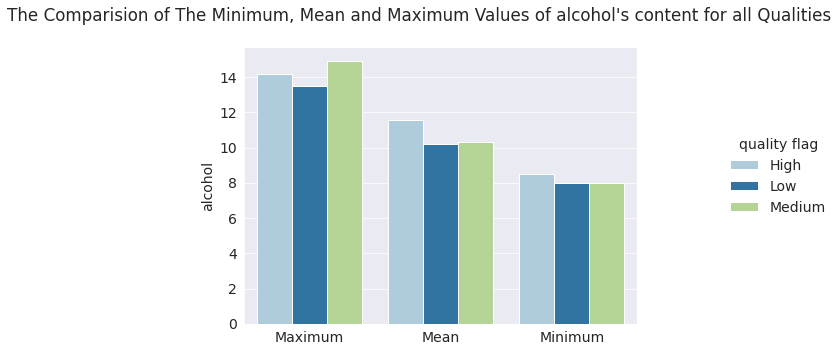

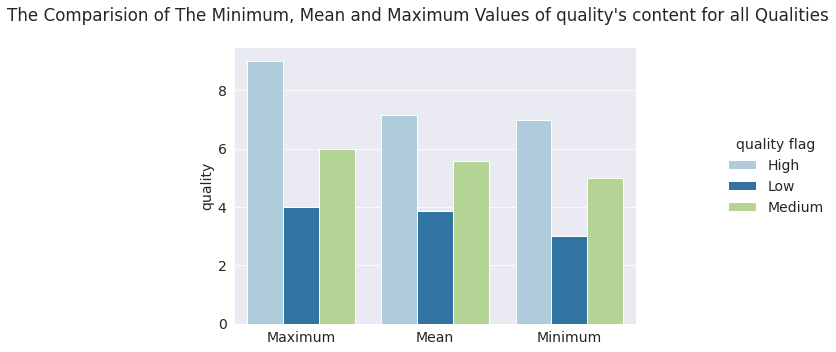

In [32]:
# soften the multi index dataframe
measure = ('Mean','Minimum','Maximum')
quality_flag = ('High','Low','Medium')
data = {y:wine_quality_summary[y] for y in wine_quality_summary.columns} 
index = pd.MultiIndex.from_product([measure,quality_flag], names=['measure','quality flag'])
wine_quality_summary_ = pd.DataFrame(data = data, index=index).reset_index()

# plot the multi index dataframe using catplot()
for x in wine_quality_summary_.columns[2:]:
    f=sns.catplot(x='measure', y=x, hue='quality flag', data=wine_quality_summary_, kind='bar',order=('Maximum','Mean','Minimum'),palette=sns.color_palette("Paired")) 
    f.set_xlabels('')
    f.fig.suptitle(f'The Comparision of The Minimum, Mean and Maximum Values of {x}\'s content for all Qualities')
    plt.tight_layout()

From the charts above, it is very easy to see how the average, minimum and maximum values of each feature differ from one quality to the other. For instance, the volatile acidity level of a low quality wine is higher than that of medium quality wine and that of medium quality wine is higher than high quality wine in terms of average, minimum and maximum values.

**Q3: How does the features explain qualities of the different wine types by their:**
1. average values?
2. minimum values?
3. maximum values?

The above questions are answered below by grouping the dataframe by `quality flag` and `wine type` with the different groups aggregated by `mean()`, `min()` and `max()` to get the average, minumum and maximum values of each of the features. The groups were concatinated to produce a dataframe that compares the mean, minimum and maximum values of different wine qualities of the two types of wines - red wine and white wine. The dataframe was reorganised so as to produce a better visualization of the information in bar charts. The bar charts were plotted using seaborn's `catplot()` function. In figuare, the first column represent high quality wine, the second column represent low quality wine and the last column represents medium quality wine. From the graphs, for a given quality, the maximum, mean and maximum contents for each wine type are compared.

In [33]:
# create dataframes using groupby
mean_summary = df.groupby(['quality flag','wine type']).mean()
min_summary = df.groupby(['quality flag', 'wine type']).min()
max_summary = df.groupby(['quality flag', 'wine type']).max()

# concatinate the dataframes
stat_summary = pd.concat([mean_summary, min_summary, max_summary],keys=['Mean','Minimum','Maximum'],names=['measure'])
stat_summary

fixed acidity  volatile acidity  citric acid  \
measure quality flag wine type                                                  
Mean    High         Red Wine         8.820109          0.405870     0.372880   
                     White Wine       6.690970          0.268964     0.328933   
        Low          Red Wine         7.871429          0.724206     0.173651   
                     White Wine       7.193064          0.376503     0.308786   
        Medium       Red Wine         8.251169          0.538898     0.261286   
                     White Wine       6.860007          0.278157     0.337327   
Minimum High         Red Wine         4.900000          0.120000     0.000000   
                     White Wine       3.900000          0.080000     0.010000   
        Low          Red Wine         4.600000          0.230000     0.000000   
                     White Wine       4.200000          0.110000     0.000000   
        Medium       Red Wine         4.700000          0.160000     0.000000   
                     White Wine       3.800000          0.080000     0.000000   
Maximum High         Red Wine        15.600000          0.915000     0.760000   
                     White Wine       9.200000          0.760000     0.740000   
        Low          Red Wine        12.500000          1.580000     1.000000   
                     White Wine      11.800000          1.100000     0.880000   
        Medium       Red Wine        15.900000          1.330000     0.790000   
                     White Wine      14.200000          0.965000     1.660000   

                                 residual sugar  chlorides  \
measure quality flag wine type                               
Mean    High         Red Wine          2.703804   0.076049   
                     White Wine        4.606000   0.037367   
        Low          Red Wine          2.684921   0.095730   
                     White Wine        4.718208   0.050549   
        Medium       Red Wine          2.484397   0.089691   
                     White Wine        6.349106   0.048011   
Minimum High         Red Wine          1.200000   0.012000   
                     White Wine        0.800000   0.012000   
        Low          Red Wine          1.200000   0.045000   
                     White Wine        0.700000   0.013000   
        Medium       Red Wine          0.900000   0.034000   
                     White Wine        0.600000   0.009000   
Maximum High         Red Wine          8.900000   0.358000   
                     White Wine       19.250000   0.135000   
        Low          Red Wine         12.900000   0.610000   
                     White Wine       17.550000   0.290000   
        Medium       Red Wine         15.500000   0.611000   
                     White Wine       65.800000   0.346000   

                                 free sulfur dioxide  total sulfur dioxide  \
measure quality flag wine type                                               
Mean    High         Red Wine              13.972826             35.358696   
                     White Wine            34.129091            122.013333   
        Low          Red Wine              12.063492             34.444444   
                     White Wine            26.618497            129.500000   
        Medium       Red Wine              16.428058             49.424910   
                     White Wine            35.583699            141.869389   
Minimum High         Red Wine               3.000000              7.000000   
                     White Wine             5.000000             34.000000   
        Low          Red Wine               3.000000              7.000000   
                     White Wine             3.000000             10.000000   
        Medium       Red Wine               1.000000              6.000000   
                     White Wine             2.000000              9.000000   
Maximum High         Red Wine              54.000000            289.000000   
 

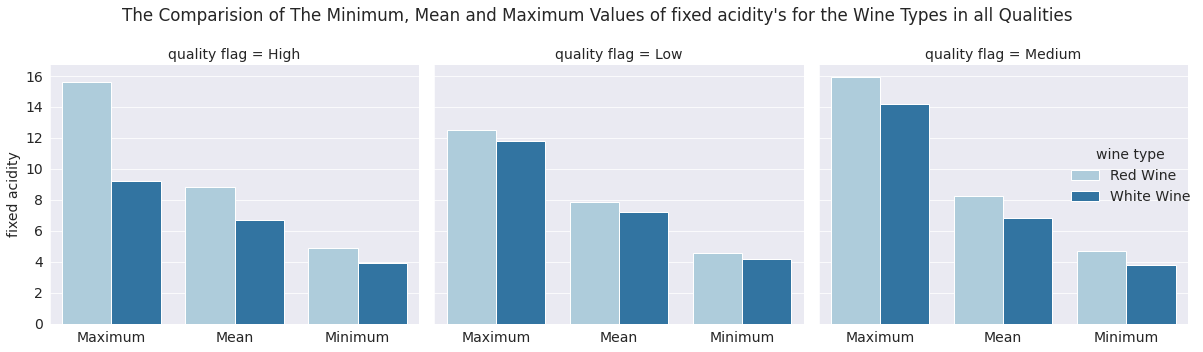

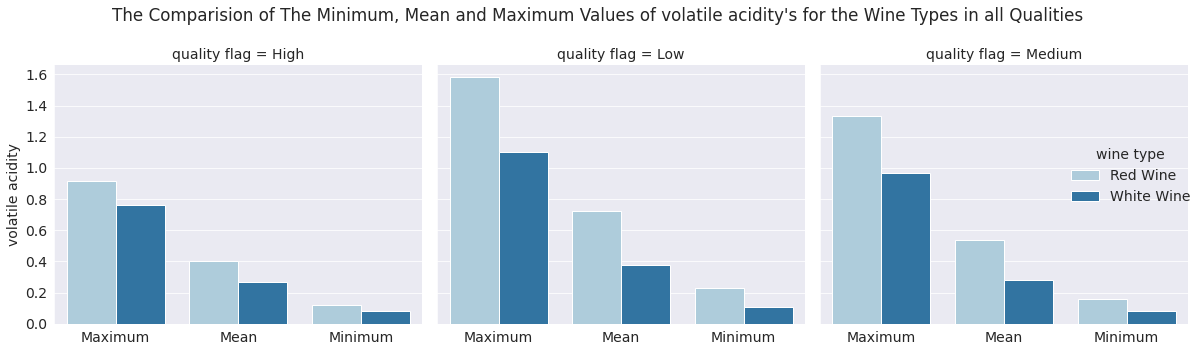

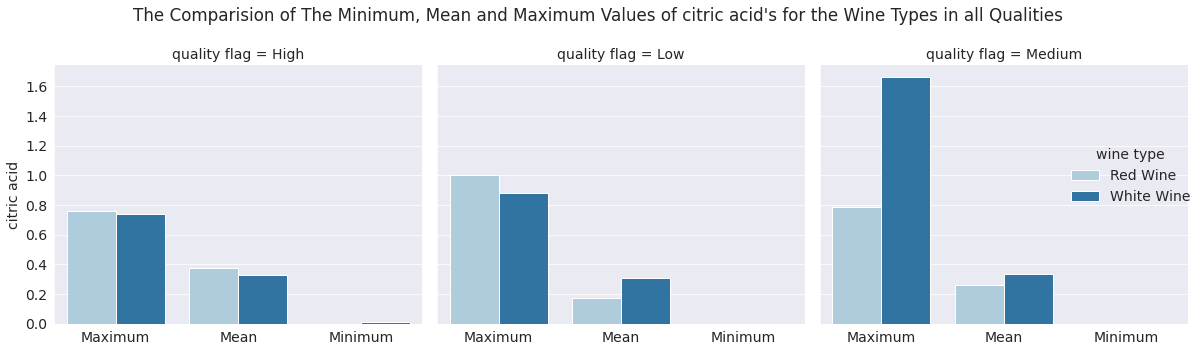

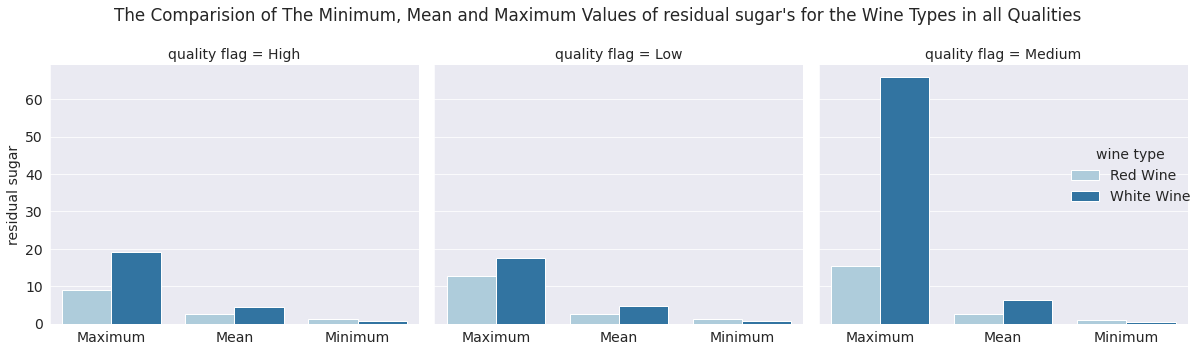

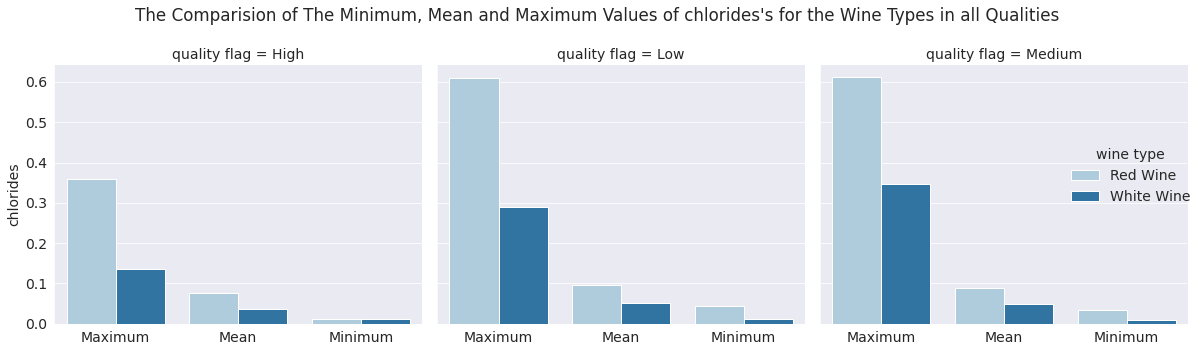

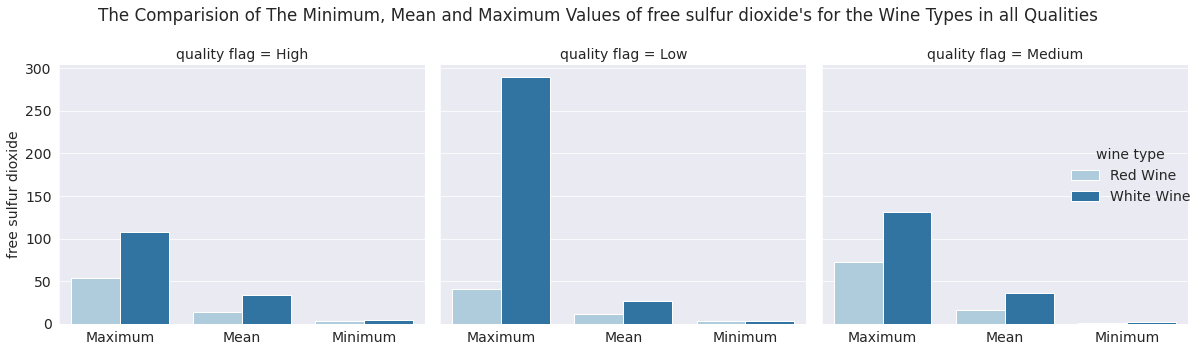

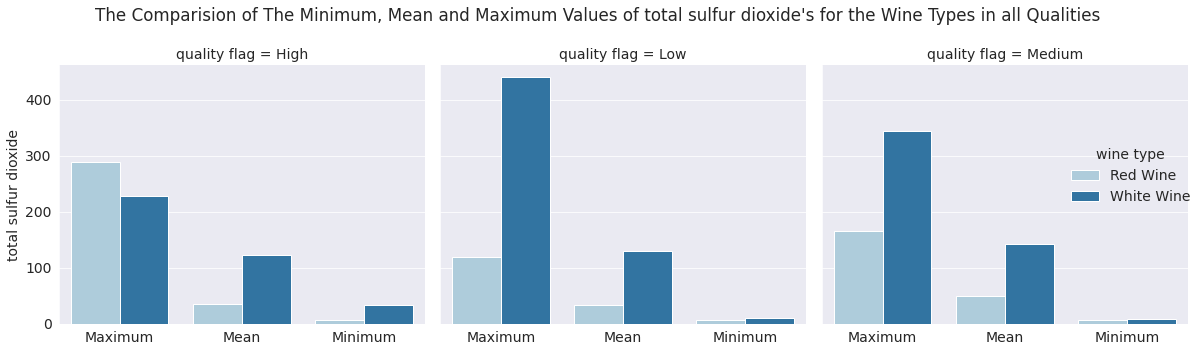

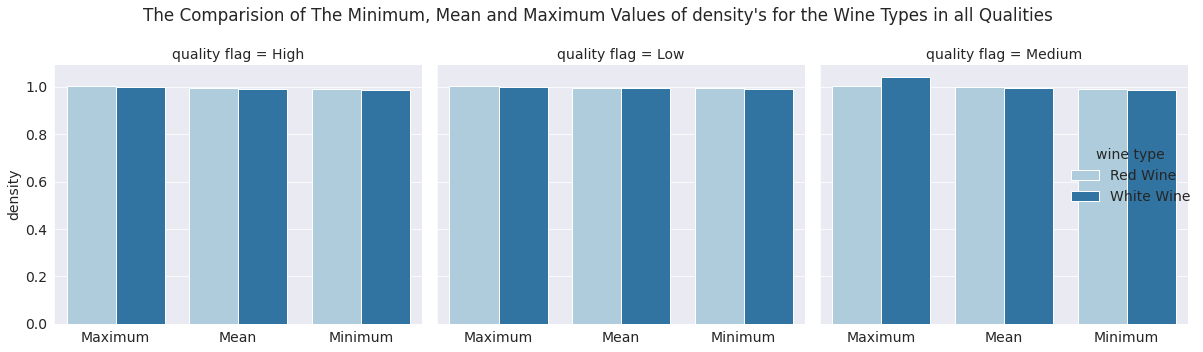

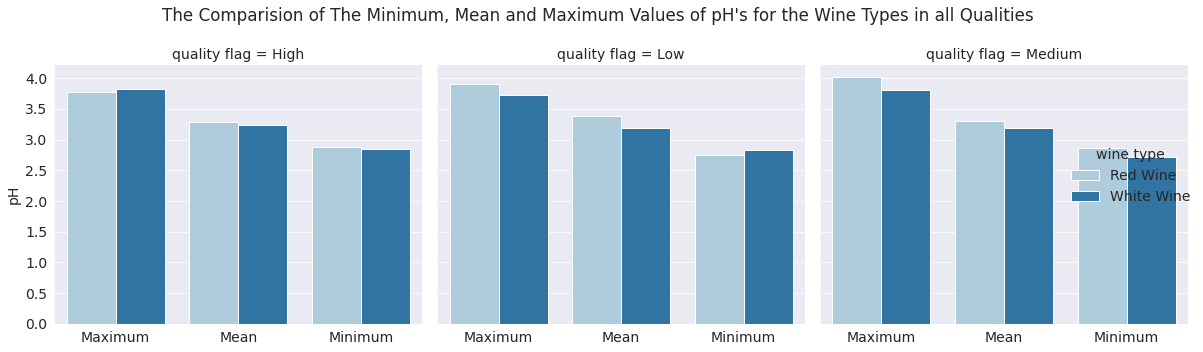

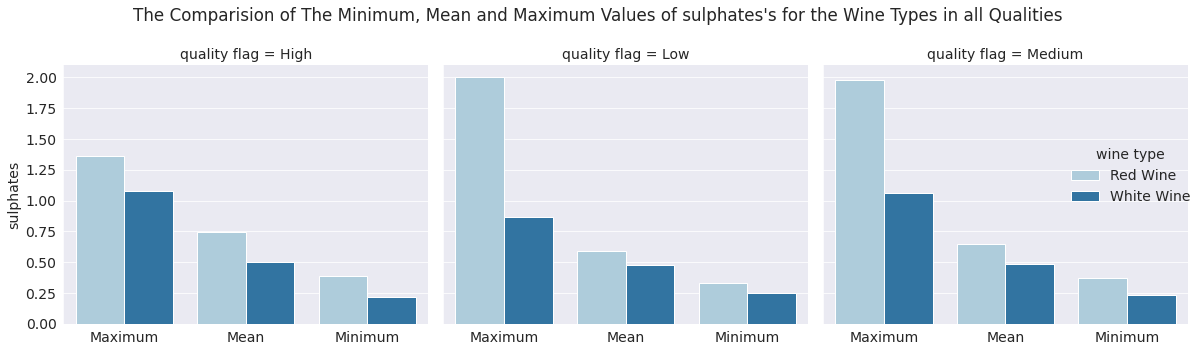

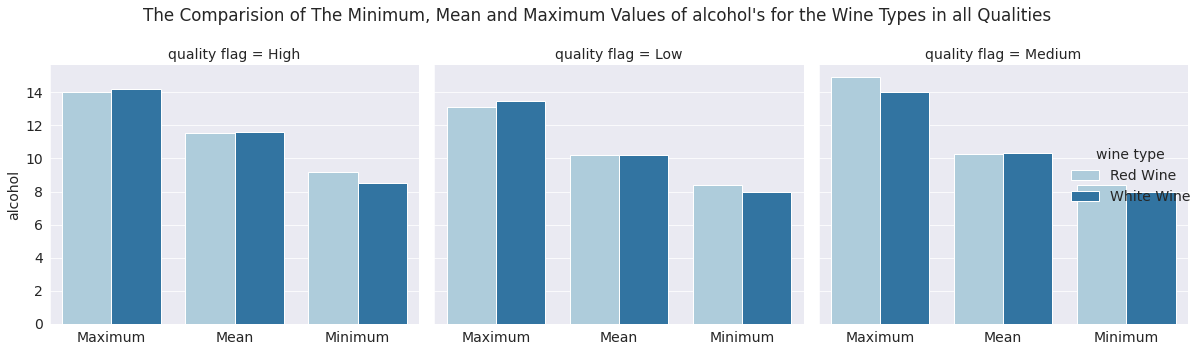

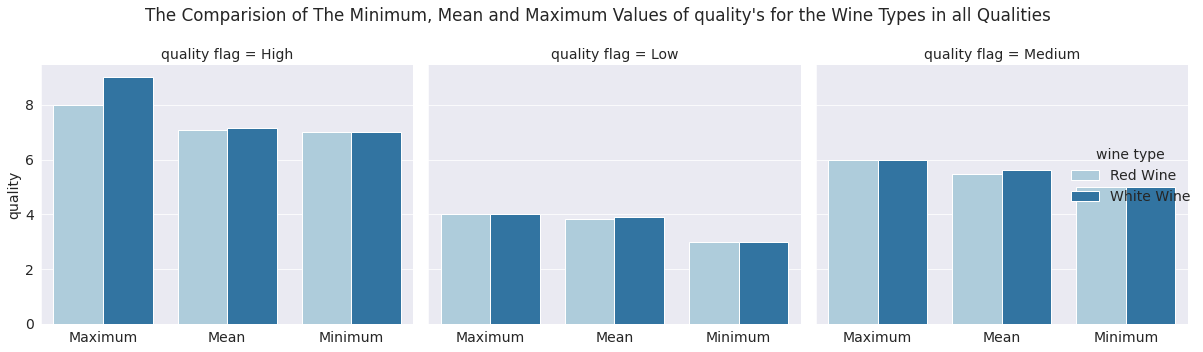

In [34]:
# soften the multi index dataframe
measure =('Mean','Minimum','Maximum')
quality_flag = ('High','Low','Medium')
wine_type = ('Red Wine', 'White Wine')
data = {x:stat_summary[x] for x in stat_summary.columns} 
index = pd.MultiIndex.from_product([measure,quality_flag,wine_type], names=['measure','quality flag','wine type'])
stat_summary_ = pd.DataFrame(data = data, index=index).reset_index()

# plot the multi index dataframe using catplot()
for x in stat_summary_.columns[3:]:
    f=sns.catplot(x='measure', y=x, hue='wine type', col='quality flag', data=stat_summary_, kind='bar',order=('Maximum','Mean','Minimum'),palette=sns.color_palette("Paired")) 
    f.set_xlabels('')
    f.fig.suptitle(f'The Comparision of The Minimum, Mean and Maximum Values of {x}\'s for the Wine Types in all Qualities')
    plt.tight_layout()

From the above charts, almost all the features distingush clearly the qualities of the wine types by the mean, minimum and maximum values.

Next is to visualise the correlation of the numerical features. This will be done using seaborn's `pairplot()` function. The function shows the scatter plots of the different numerical features.

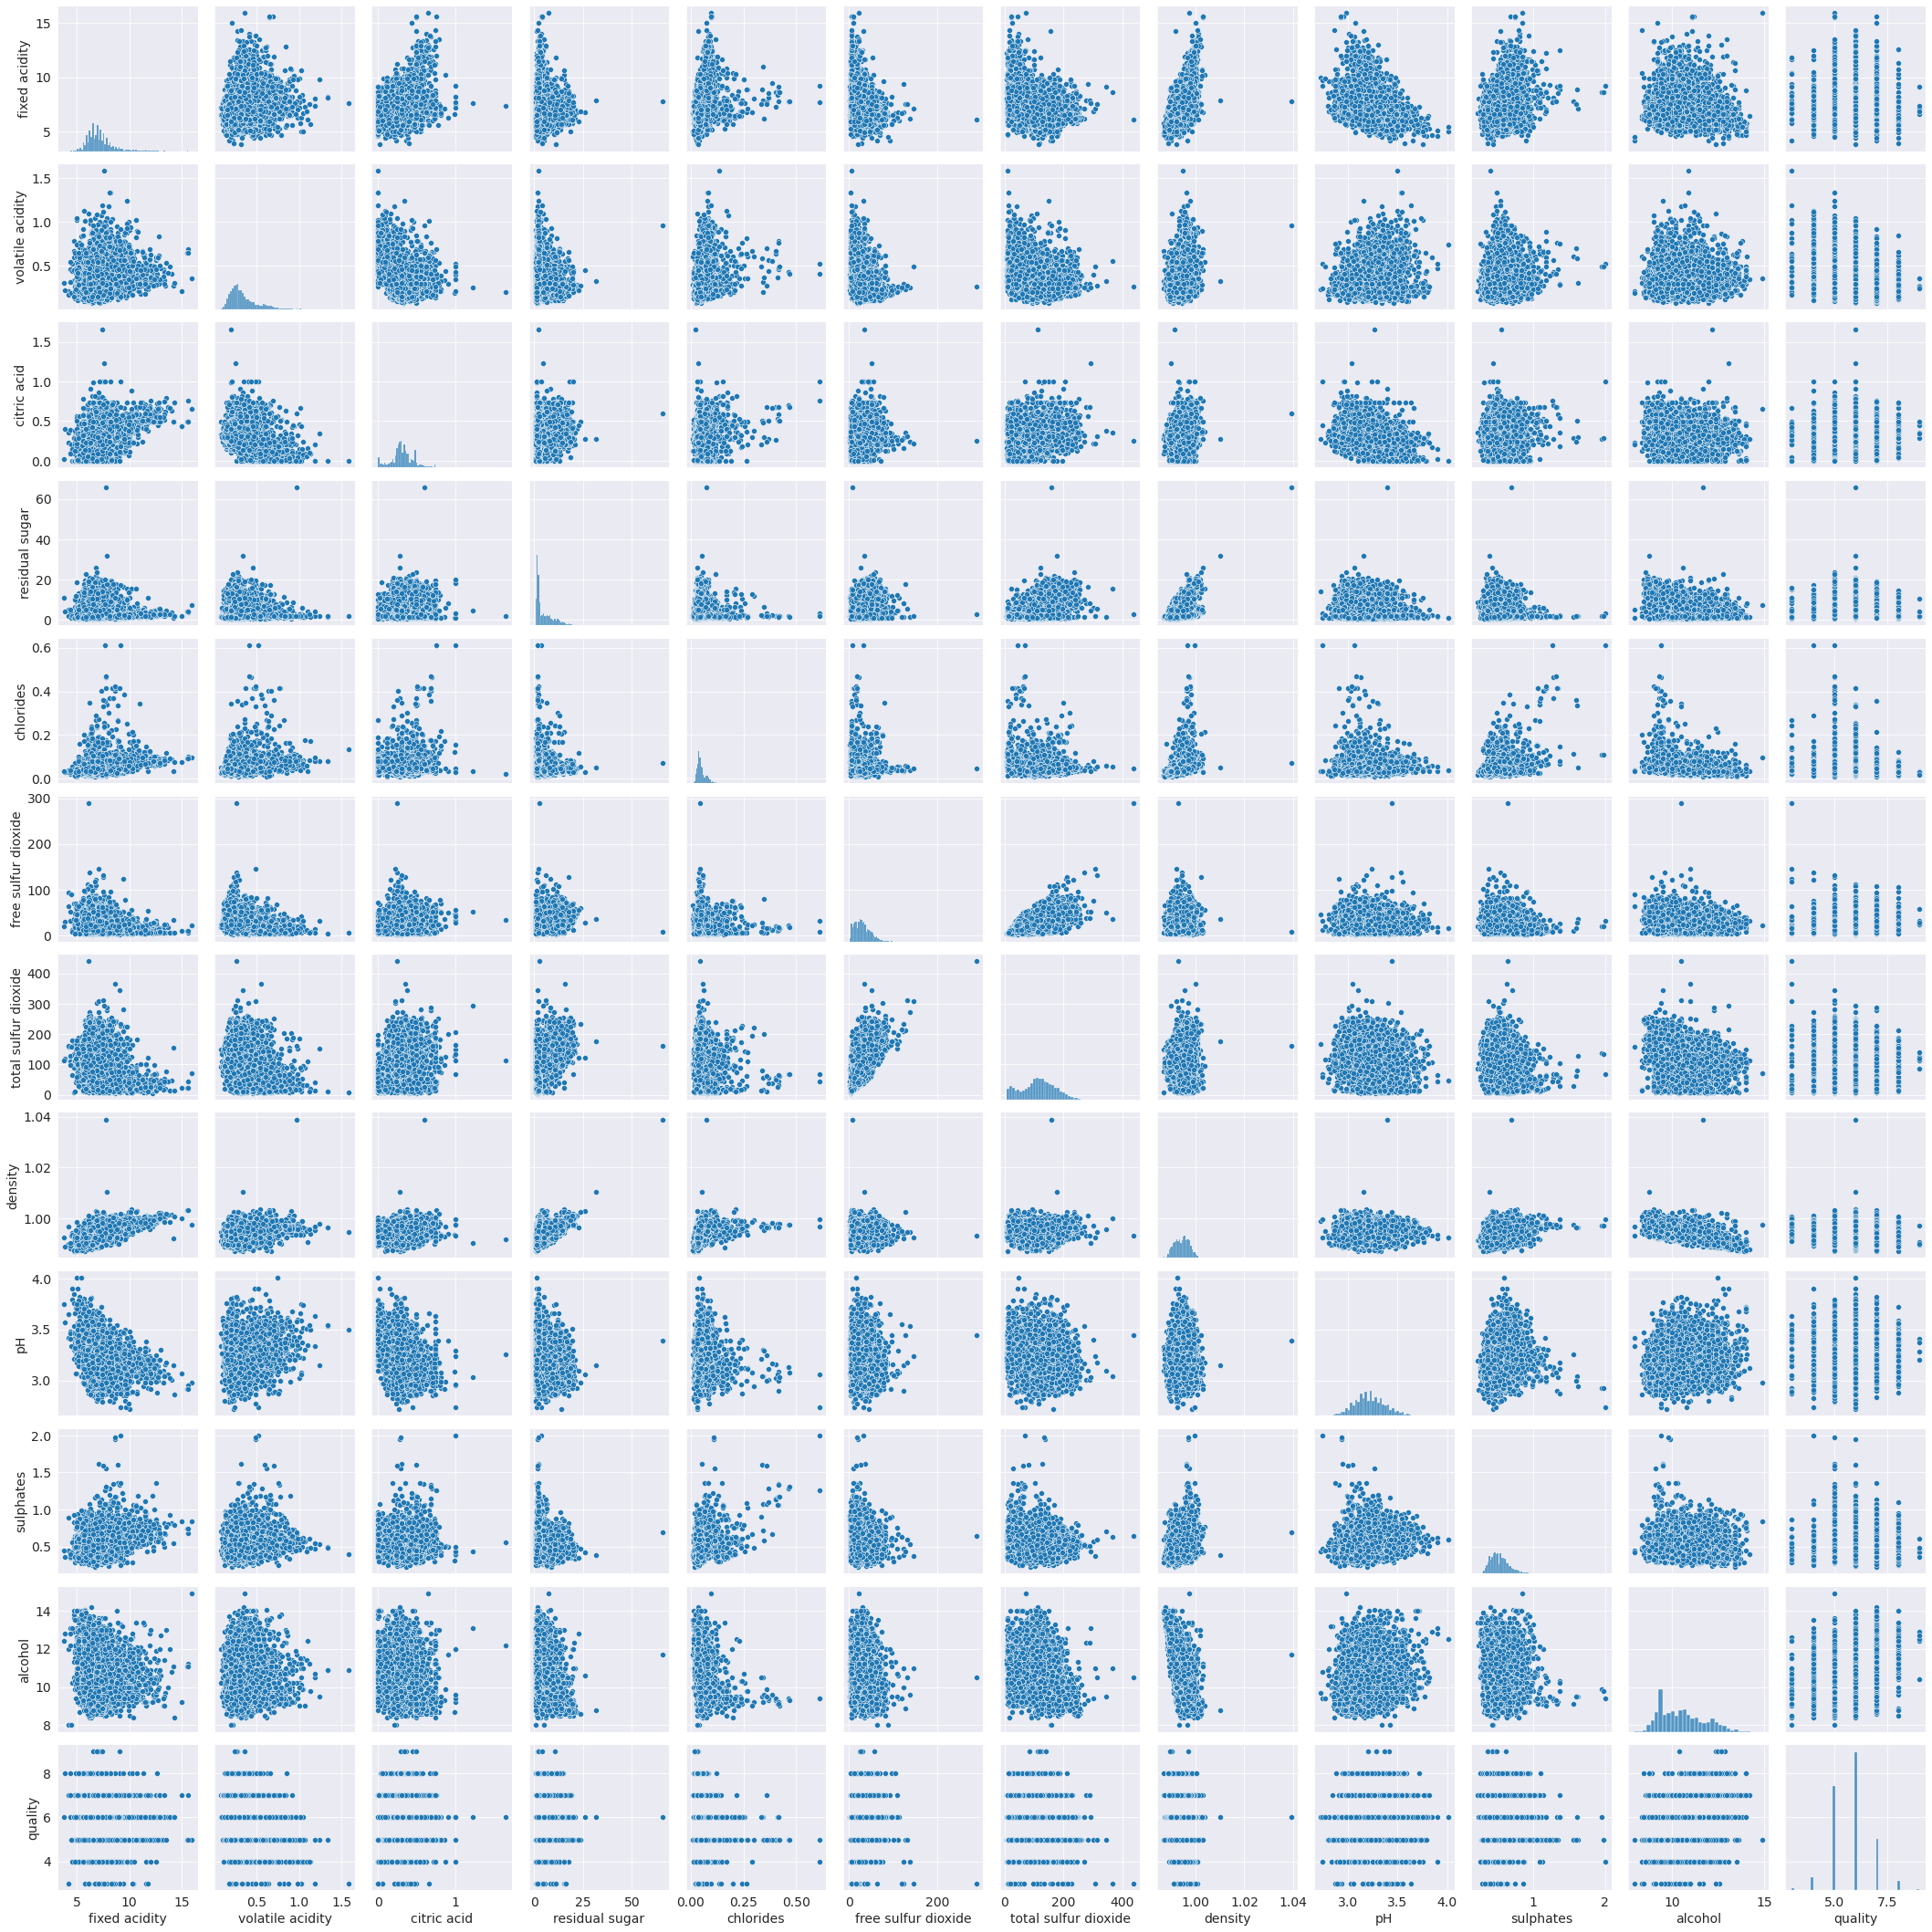

In [35]:
sns.pairplot(df);

Some of the features show strong relationships and some show a negligible relationships. The correlation matrix that will be seen in the next subsetion will help to understand these relationships. 

The above pair plots conludes the bivariate analysis. The next in this section is the multivariate analysis.

### Multivariate Analysis

Multivariate analysis deals with analysis of three or more variables at a time. In This case, it is a continuation of the pair plot above which leads to the following;

**Q4: How does the pair relationships of the features explain the wine types?**

To answer the above question, the pair plots will be repeated but hued this time by `wine type`.

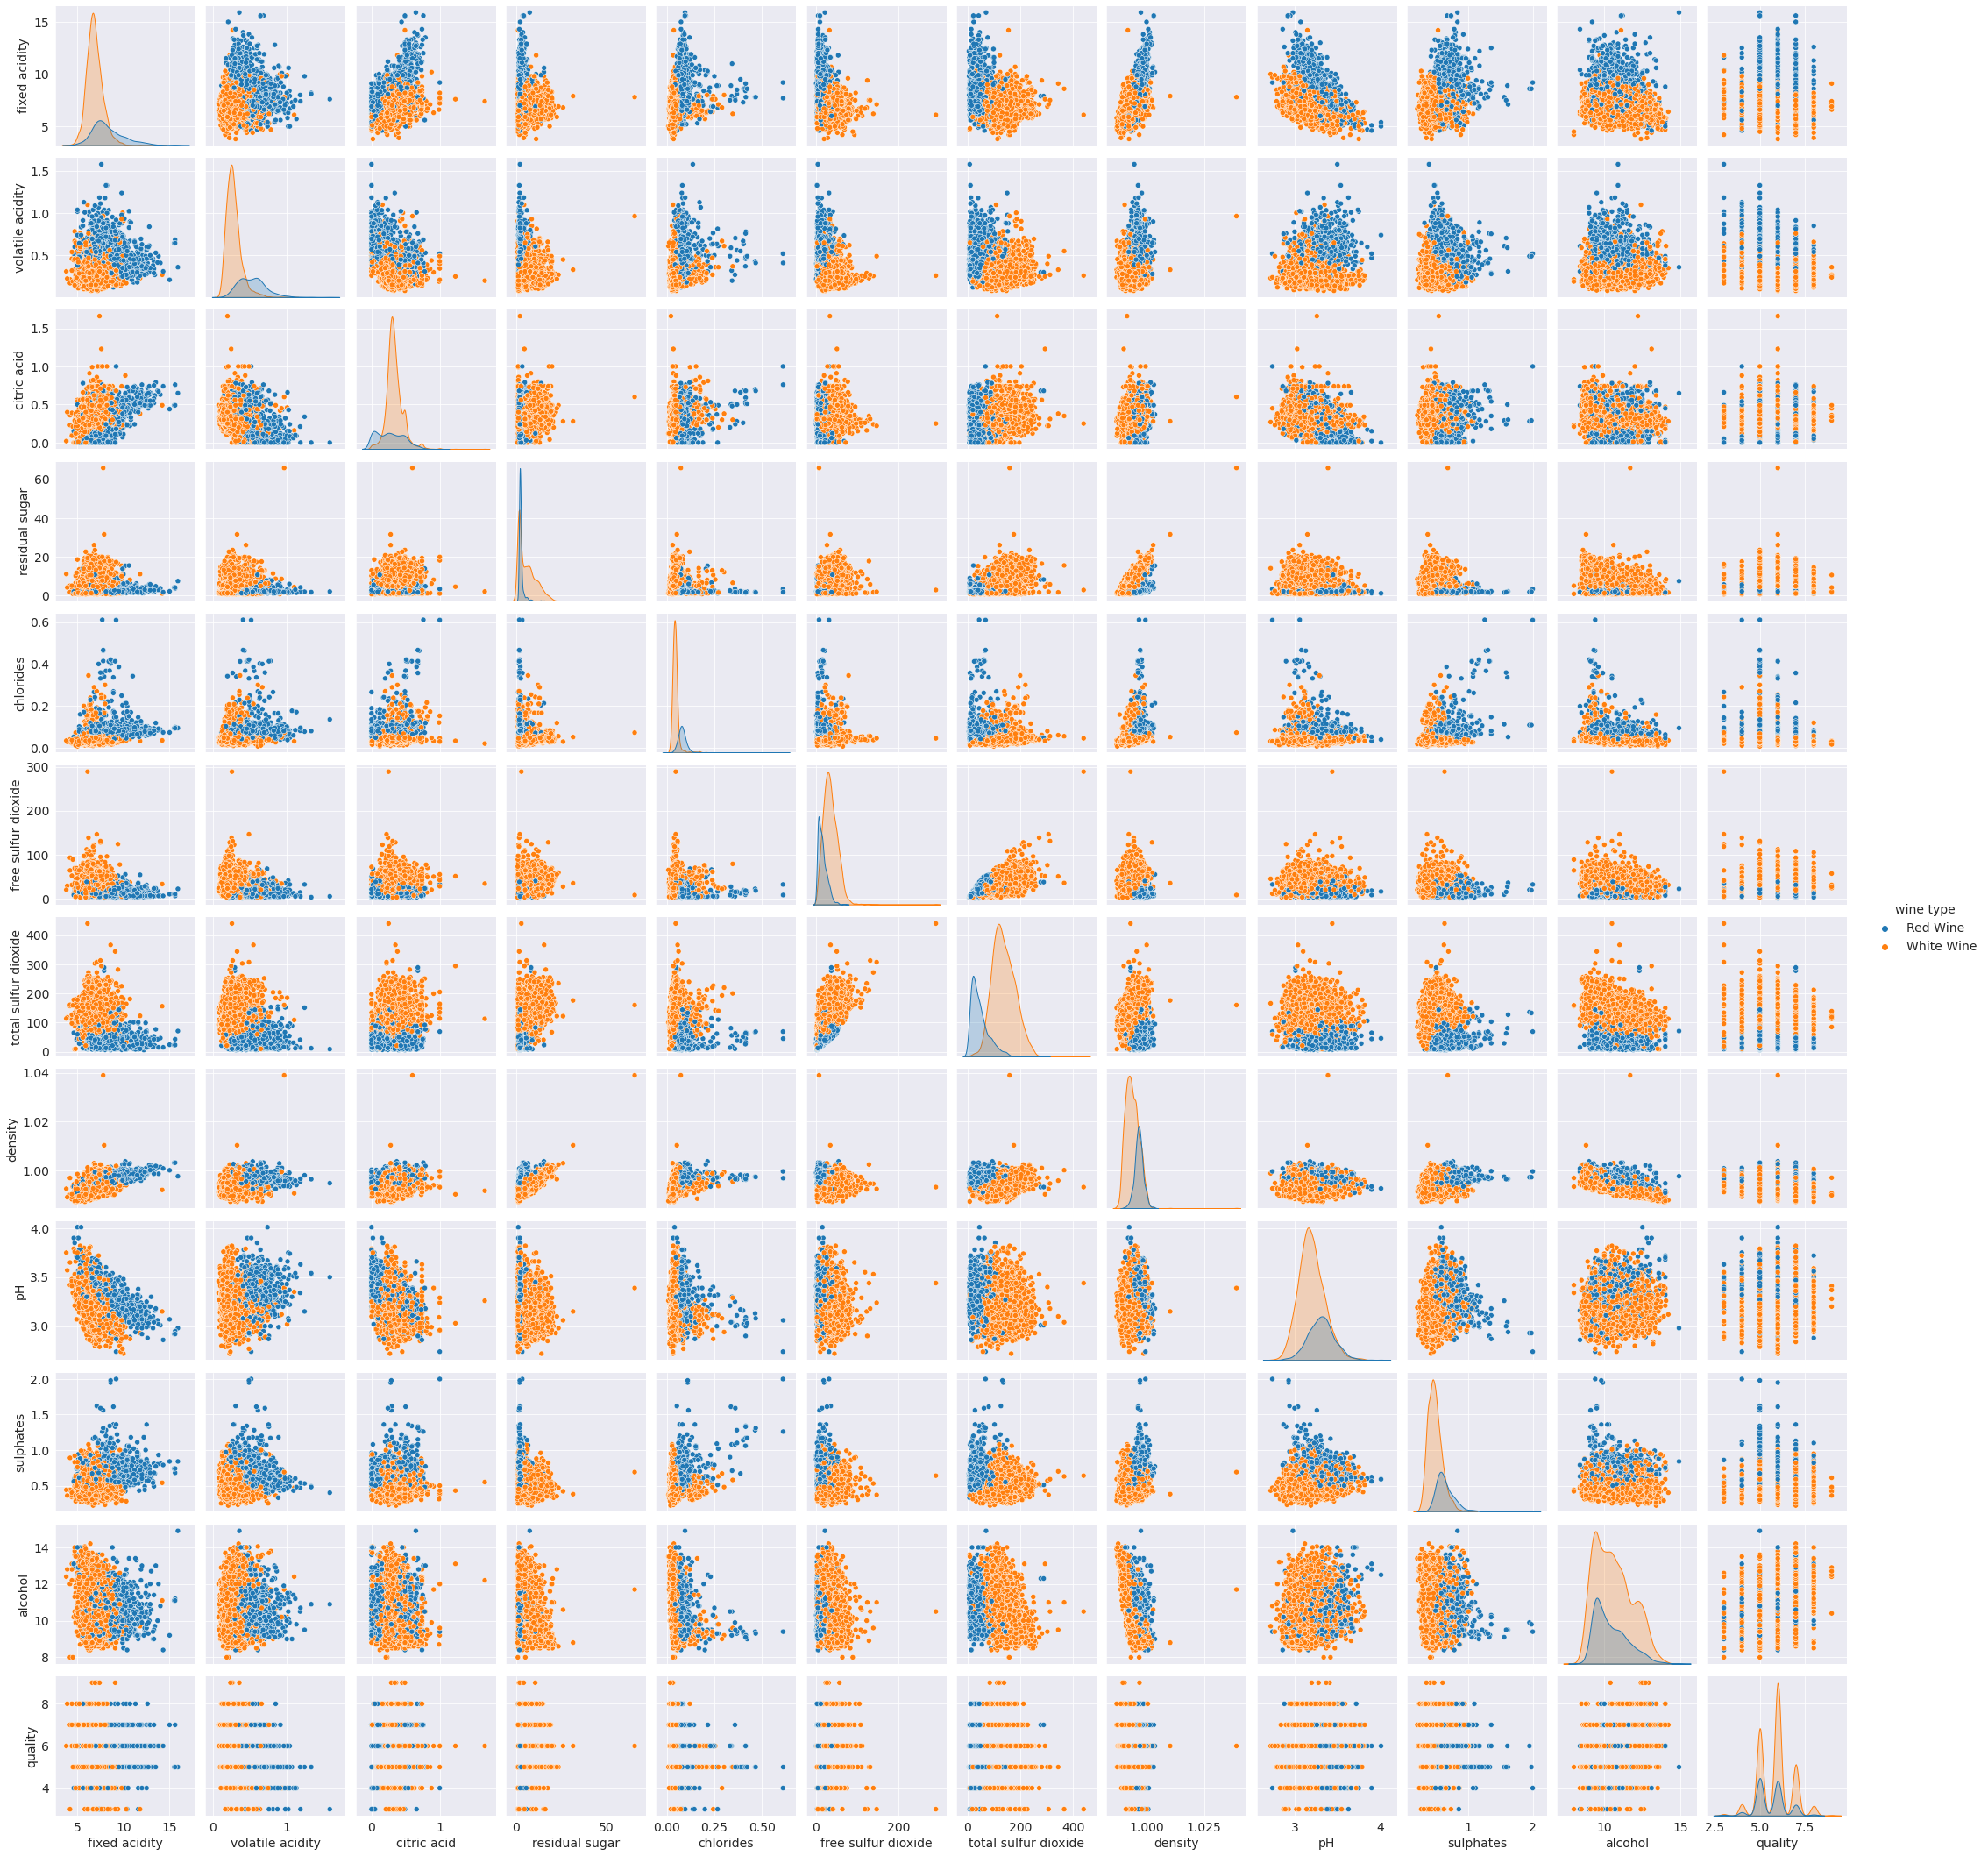

In [36]:
sns.pairplot(df,hue='wine type');

From the pair plots, the clusters created by the wine types on the scatter plots are crystal clear. This means that given a wine type, there is clear difference regarding their contents.

**Q5: How does the pair relationships between the features explain the wine qualities?**

The same approach that was followed to answer Q4 will be followed to answer this one but hued by `quality flag`.

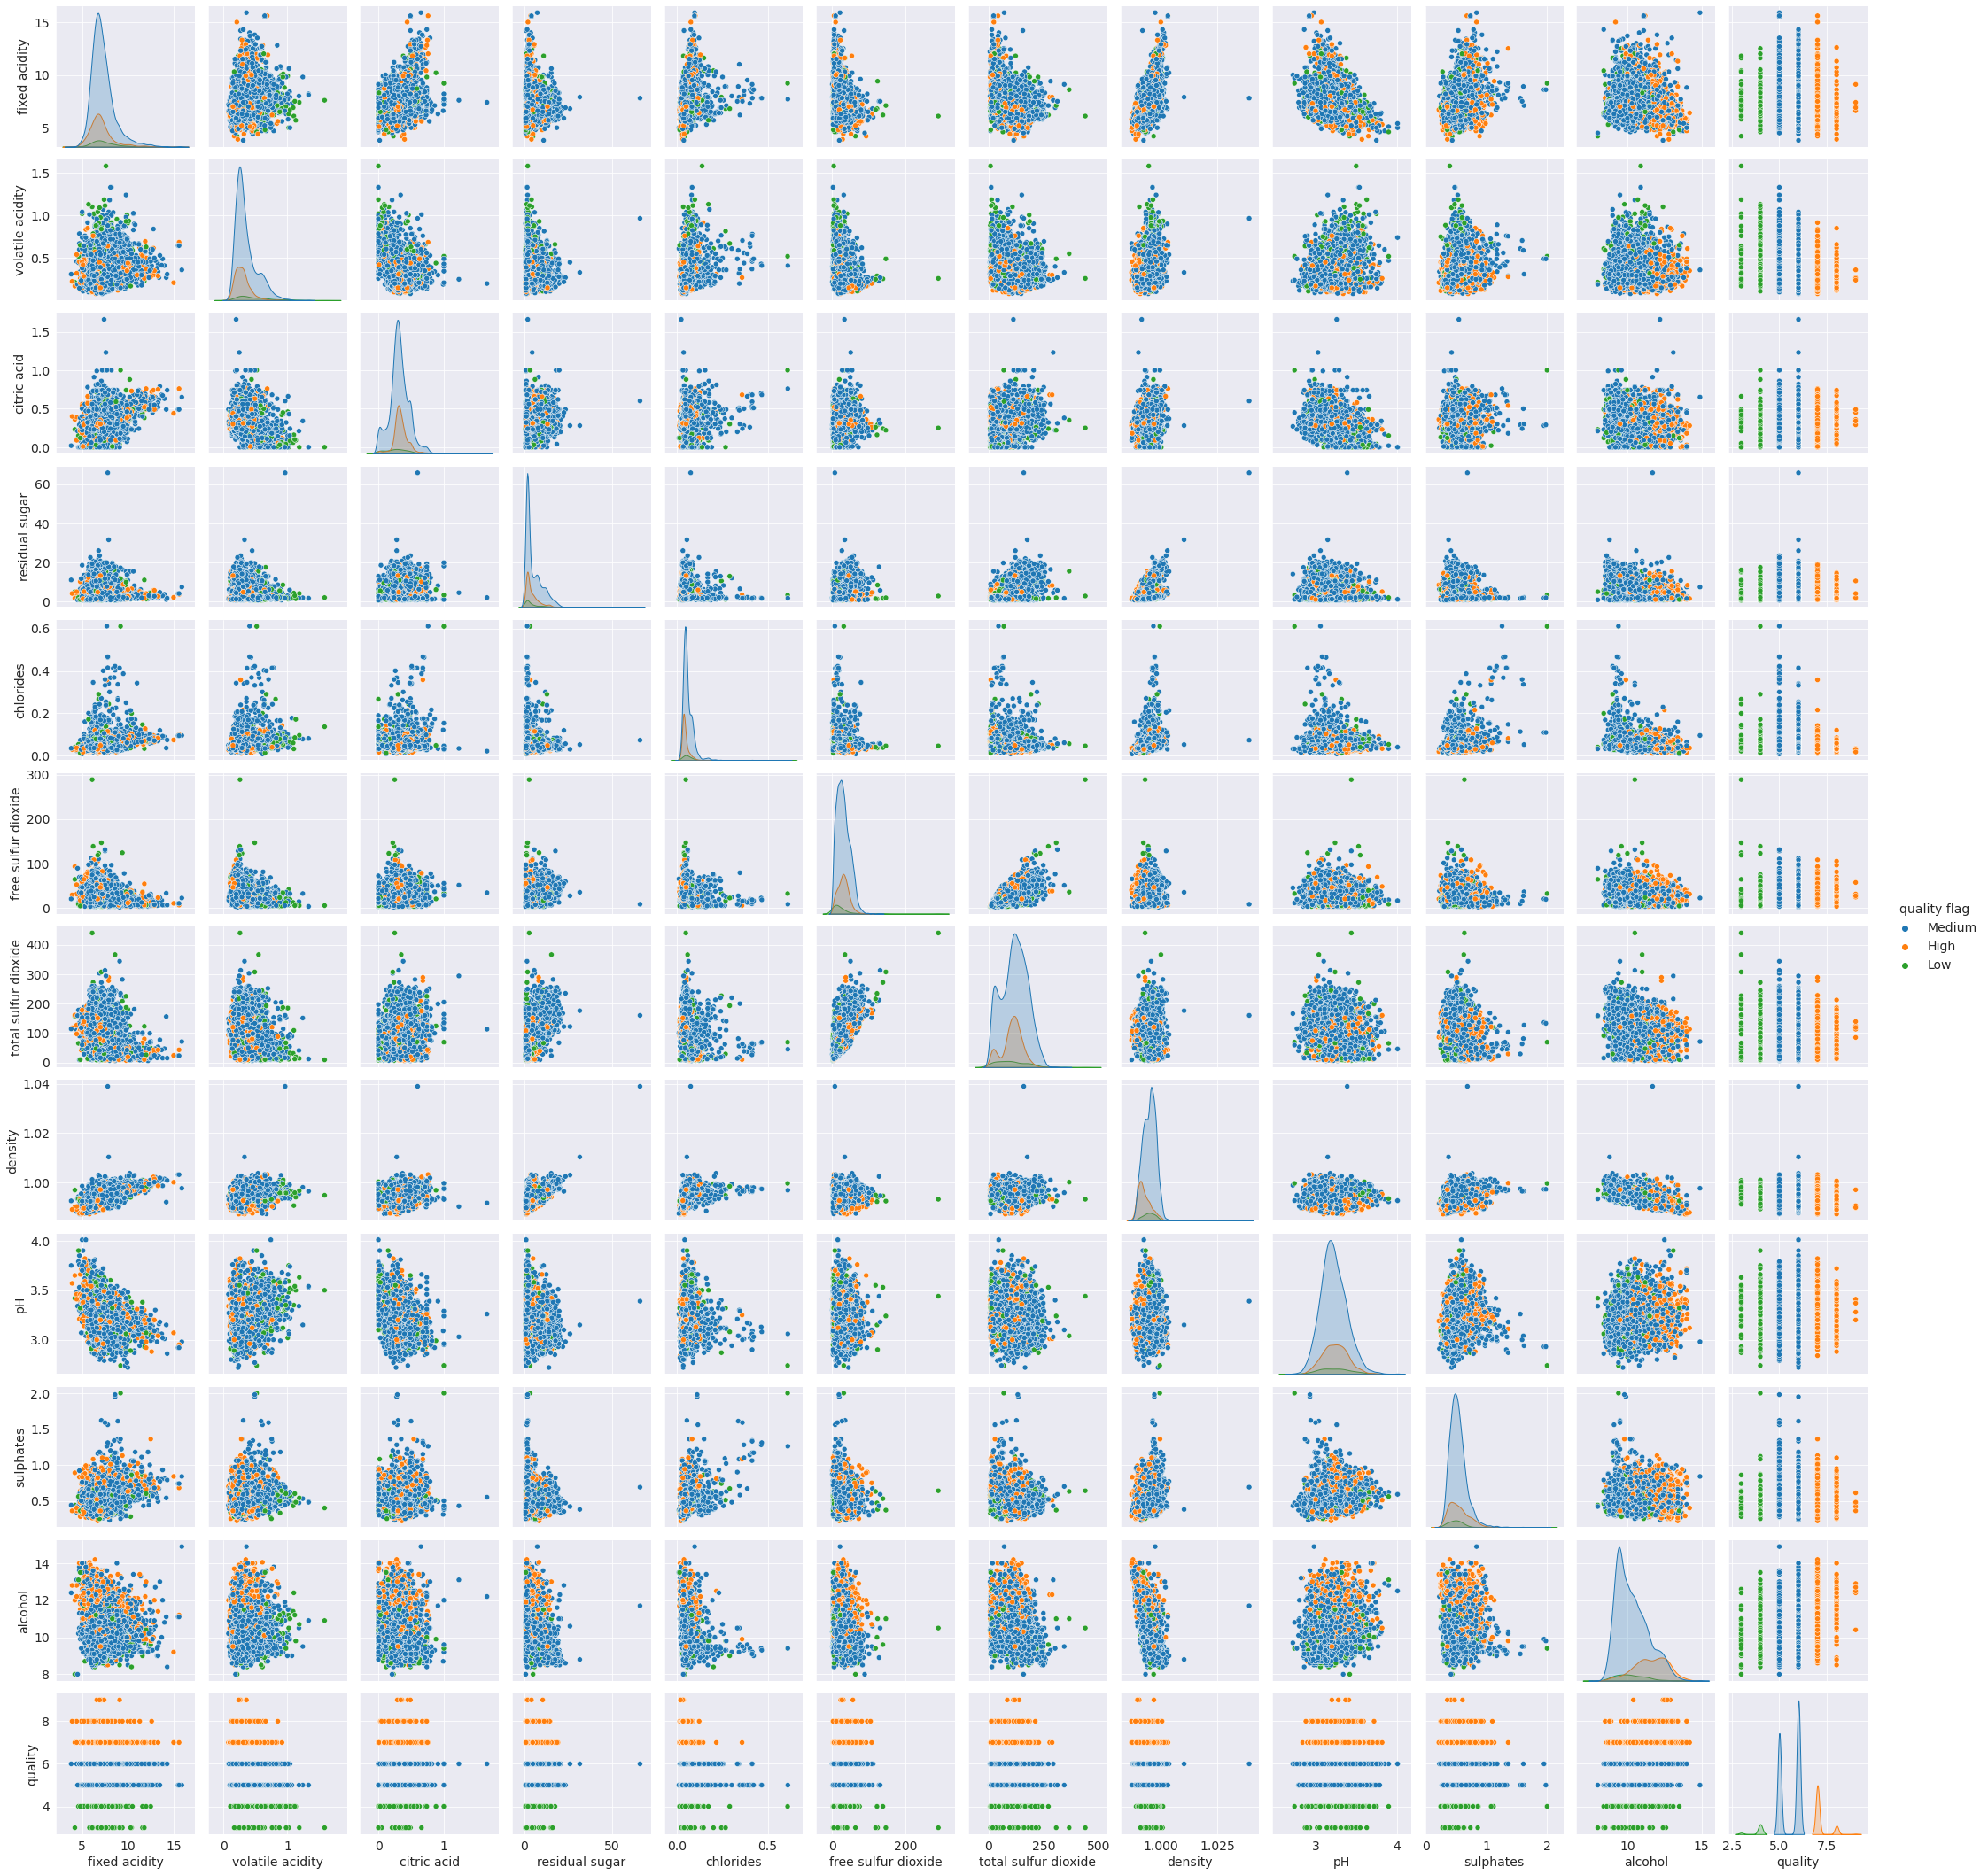

In [37]:
sns.pairplot(df,hue='quality flag');

The above plots show reluctant clustering of the wine qualities within the pair plots. The clusters are not that obvious. This is due to the close similarities of the wine qualities.

Next is to see the correlation coefficients between the numeric features. The visualization is made using the seaborn's `heatmap()`function. The function displays the array of correlation coefficients of a pair of the features for all the features.  
> N/B A correlation coefficient $\rho$, is a real number laying between -1 and 1. The interpretation follows below. 

**Interpretion Of $\rho$**

+ 0.9 to 1 positive or negative indicates a very strong positive or negative correlation respectively.
+ 0.7 to 0.9 positive or negative indicates a strong positive or negative correlation respectively.
+ 0.5 to 0.7 positive or negative indicates a moderate positive or negative correlation respectively.
+ 0.3 to 0.5 positive or negative indicates a positive or negative weak correlation respectively.
+ 0 to 0.3 positive or negative indicates a negligible positive or negative  correlation respectively.

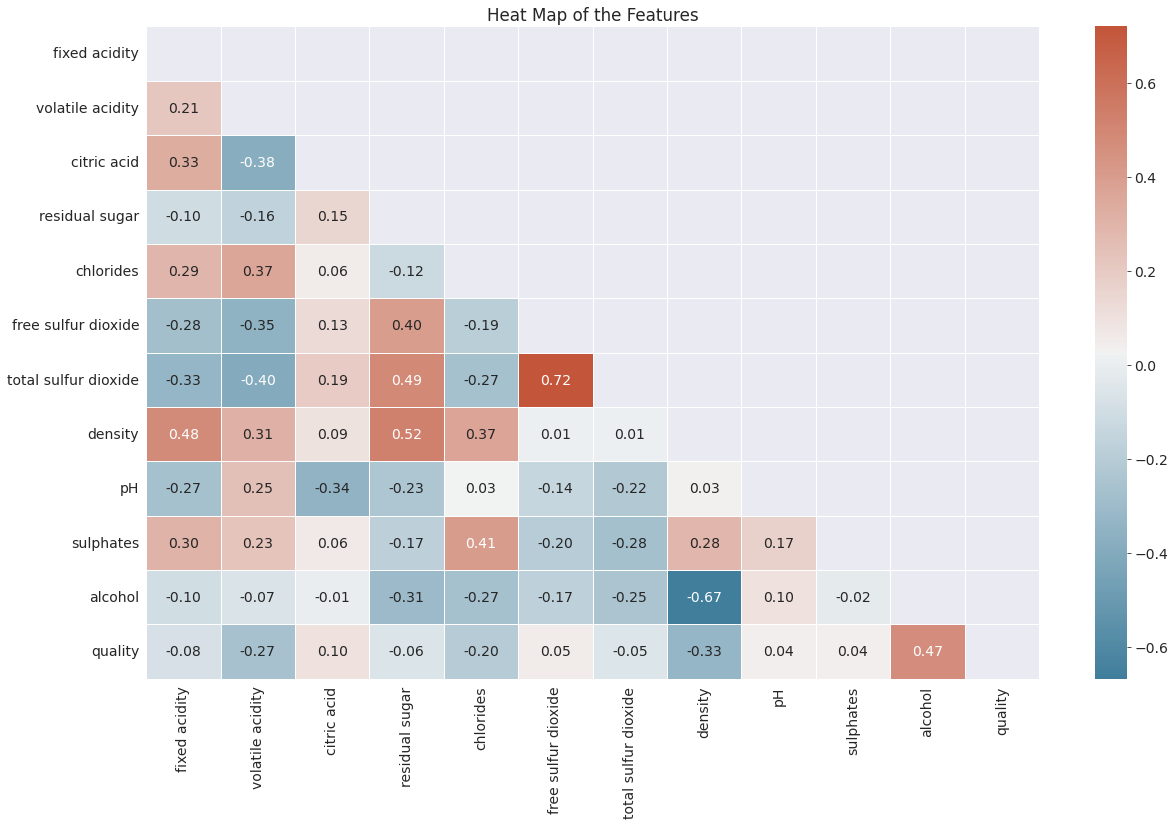

In [35]:
plt.figure(figsize=(20,12)) 
plt.title('Heat Map of the Features')
corr = df.corr() 
mask = np.triu(np.ones_like(corr,dtype=bool)) 
cmap = sns.diverging_palette(230,20,as_cmap=True) 
sns.heatmap(corr,mask=mask,linewidths=1,cmap=cmap,annot=True,fmt='.2f');

The heatmap shows that there are some strong, moderate and negligible correlation between the variables. For instance, there is a strong positive correlation between free sulfur dioxide and total sulfur dioxide while there is a moderate negative correlation between density and alcohol. 

The heatmap concludes the anlysis.

## Inferences

The dataset holds a handle full of information that have been uncovered in this analysis. The insights give clue about what should be considered for optimum model performance. Below is the summary of the important insights from the analysis that will help in modelling:

+ The dataset contains more white wine instances than red wine instances.

+ There are more medium quality wine instances than high and low quality wine instances.

+ There are outliers in the dataset.

+ Not all the scatter plots have clusters based on wine quality.

+ The clusters that exist are not crystal clear.

+ There are some features that correlate strongly, moderately and negligiblly with each other. This will pose a challenge linear classifers.

Due to the above insights, clearful considerations will be taken to prepare the dataset for modelling.

## Model Development

Obviously, the underlying problem is a multiclass classification task. A multiclass classification task is a supervised machine learning task where the goal is to predict the class of each of the observations given their features. To this, the dataset will have to be transformed to suit the algorithms that will be needed for the task.

### Transformation

Generally, the dataset will undergo two forms of transformation: primary and secondary transformations.

The primary transformations are the transformations that are basically required by machine learning algorithms namely, outlier detection and encoding. As was seen earlier, the dataset contain outliers that should be accommodated to improve model performance. Also, the categorical features have to be encoded numerically since machine learning algorithms do not work with alphabets. The transformers for the task are Binarizer and OdinalLabel Encoder. The binarizer transforms binary values to numeric values of 0 and 1. This will be applied to wine types since it contains only two values. The target variable contain ordinal values and as such should be encoded so as to reserve the order. To achieve this, it will be encoded using OrdinalLabel Encoder.

In the code cell below, a function, `outlier_detect()` is defined. the function detects outliers and accommodates them as medians. The function is used on the dataframe after which `box_plot()` is called again on the dataframe.

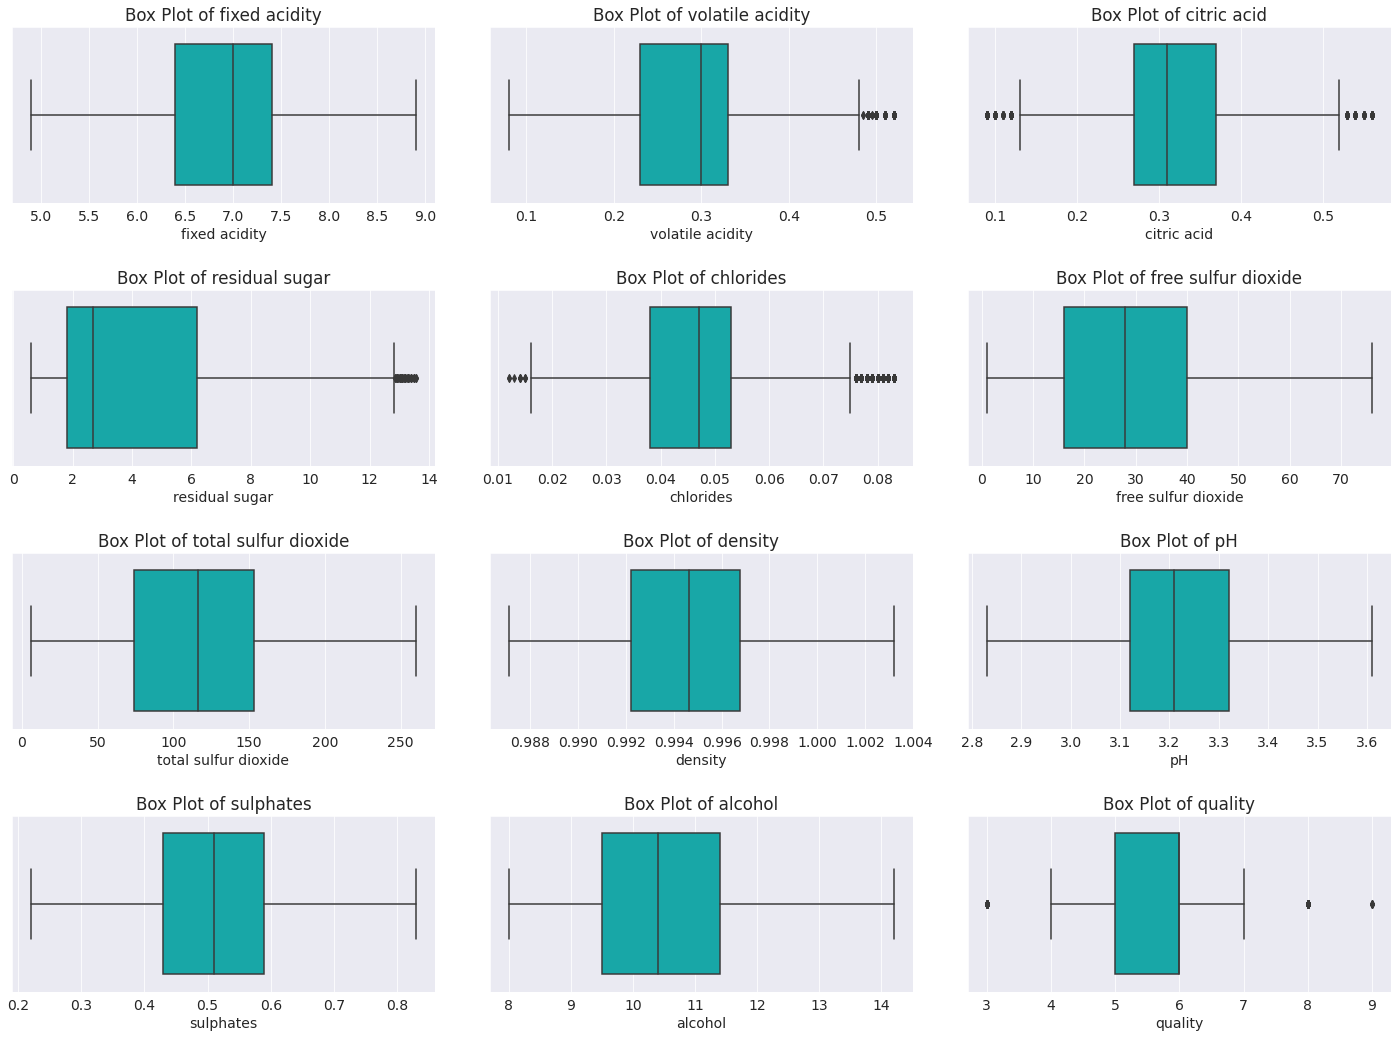

In [37]:
def outlier_detect(df,y):
    '''takes a dataframe and a list, then uses the values of the to calculate the
    the first and third quantiles which are used to calculate the lower and upper limits
    of the box plots. The lower and upper values are used to detect outliers and accommodate 
    them was the median'''
    for x in y:
        Q1 = df[x].quantile(0.25)
        Q3 = df[x].quantile(0.75)
        IQR = Q3 - Q1
        LTV = Q1 - (1.5 * IQR)
        UTV = Q3 + (1.5 * IQR)
        df[x] = np.where(df[x] < LTV, df[x].median(),df[x])
        df[x] = np.where(df[x] > UTV, df[x].median(),df[x])
    return df

# use the variables' names as a list and apply the outlier_detect() function
num_columns.remove('quality')
df = outlier_detect(df, num_columns)
num_columns.append('quality')

# inspect the dataset again for outliers
box_plot(df,num_columns,n=4,m=3,x=20,y=15)

From the box plot, is a great amount of improvement. Only few of the features have few values outside the whiskers. In the following cell, the distributions of the features are plotted again to see how `outlier_detect()` affected them.

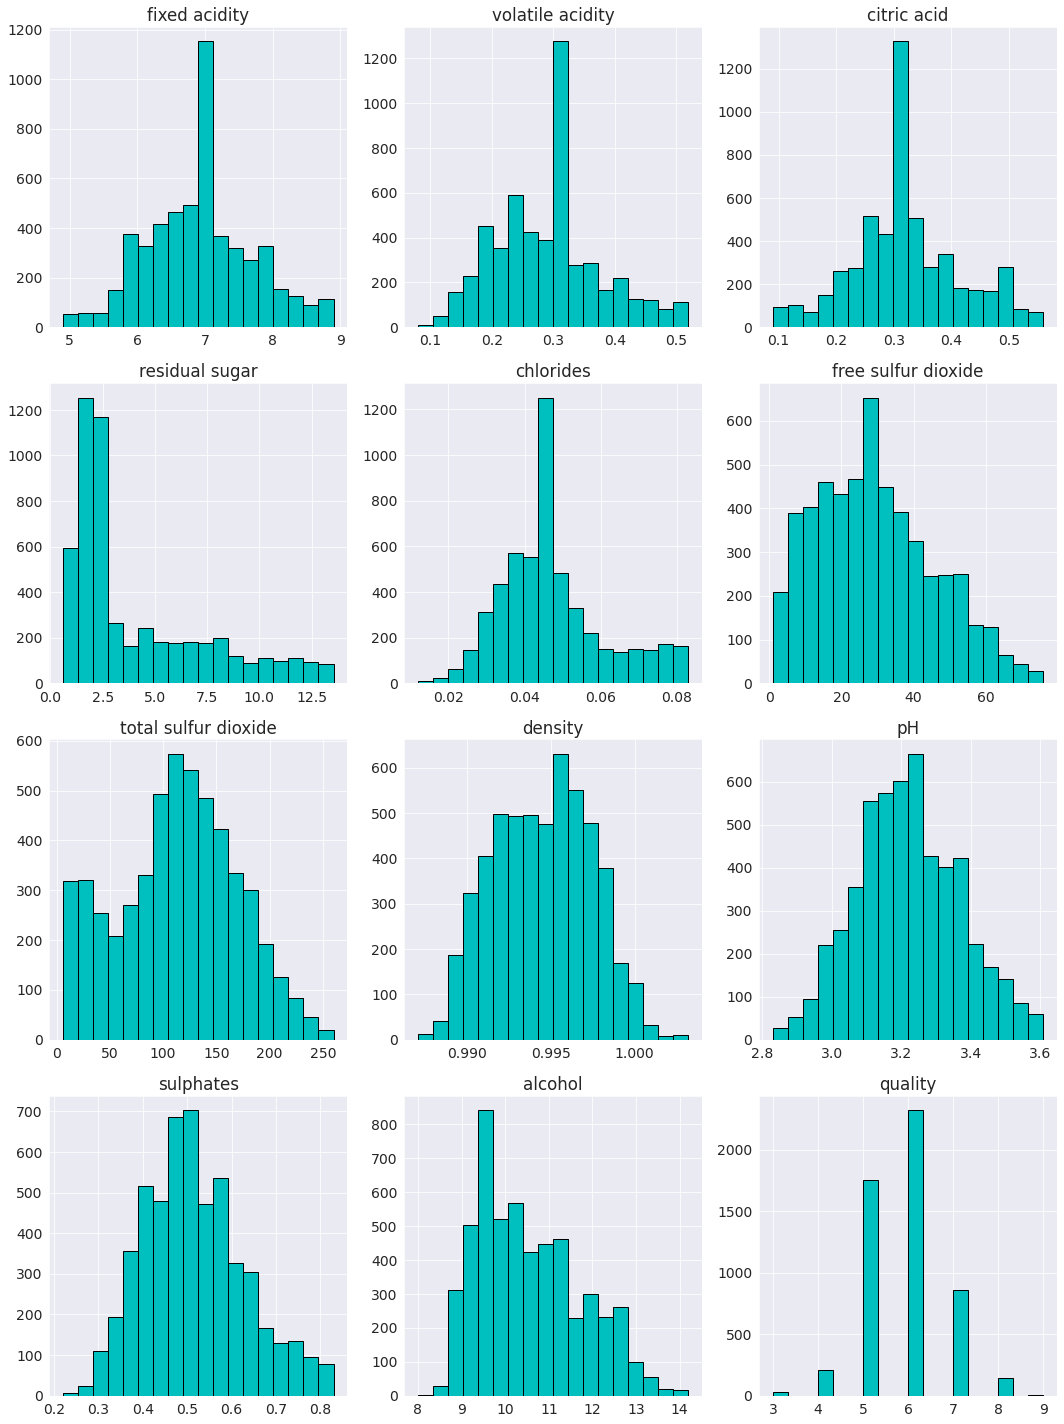

In [38]:
# plot the distributions again
df.hist(bins=18, layout=(-1,3), figsize=(15,20),color='c',edgecolor='black')
plt.tight_layout()

Most of the features are no longer skewed but now have larger kurtosis. This is as a result of the increase in numbers medians.

The last part of the primary transformation is encoding. Label binarizer object is created using `LabelBinarizer()` function. The label binarizer object is used to transform `wine type`. Lastly, ordinal encoder object is created with `OrdinalEncoder()` function and it is used to transform `quality flag`.

In [39]:
lb = LabelBinarizer()
df['wine_type_enc'] = lb.fit_transform(df['wine type'])
quality = ['Low','Medium','High']
oe = OrdinalEncoder(categories=[quality])
oe.fit(df[['quality flag']])
df['quality_flag_enc'] = oe.transform(df[['quality flag']])
df_enc = df.drop(['quality','wine type','quality flag'],axis=1)

Having completed the encoding process, the independent vectors or matrix is assigned to `X` and the dependent vector is assigned to `Y`. The dataset is then splitted to train and test sets using `train_test_split()`. 

In [40]:
# instanciate the independent matrix by droping the target variable
# instanciate the dependent 
X = df_enc.drop('quality_flag_enc',axis=1)
Y = df_enc['quality_flag_enc']

# split the sets into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.8,random_state=7)


Secondary transformation has to do with the different transformations needed by different classifiers for their optimal performances. Also, how the transformations will be used may depend on the some of the characteristics of the dataset as will be seen soon.

Another transformation that is required is combined resampling. This transformation is needed to address the high class imbalance. The learning library for this task is `imblearn.combine`. The function for the tranformation is `SMOTEENN`. It works by undersampling the majority class and oversampling the minority class by interpolation. Unfortunately, it was very difficult to install the imbalanced learning package at the time of this project because it was run offline and as such, other transformation techinques were used to get optimum performance of the used classifiers. 

**Scaling**

Two types of scaling techniques are used namely, normalization and standardization. 

Normalization is a tranformation technique that transforms the values of a feature in such a way that the minimum value is 0 and the maximum value is 1 with the rest of the values lying inbetween 0 and 1. In application, it is used to scale varibles that do not follow normal distribution. 

Standardization is a scaling technique that tranforms the values of a feature in such a way that the values range between -1 and 1 with a unit standard deviation and a zero mean. In application, it is used to scale variables that follow normal distributions or with differing scales.

In general, to used a machine learning transformer or estimator that is distance based or gradient descent based algorithms, scaling is needed to on the dataset for optimal result.

**Principal Component Analysis**

Principal component analysis, or PCA, is an unsupervised machine learning algorithm that converts high dimensional data to low dimensional data by selecting the most important features that cause the maximum variance in the target variable in a dataset. The first principal component is the feature that causes the maximum variance in the target variable. The second PCA component is the feature that causes the second maximum variance in the target variable and so on. 
To apply PCA on a dataset, the dataset is encoded and scaled because the algorithm do not work with string values and it is also distance based. When declaring the PCA object, `n_component` is used to choose the PCA component to be used. In a case where the component is not specified, all the components are used. 

PCA components are not correlated. This is why they are used mostly to avert the problem of collinearity in regression tasks. In classification tasks such as this, they are used to select the best features that best exaplain the classes to reduce runtime. As it concerns this project, PCA will not be applied to tree based classifiers. This is because tree based classifiers always select the best features to use out of many in the dataset.


### Classifiers

Few out of numerous supervised machine learning algorithms will be used for this task. Brief notes about each will be given to serve as introduction. These notes will cover the fundamental concepts of the classifiers, tuning parameters and the required transformations. The parameters that are discussed are the ones used in this notebook.
>To understand more about the classifiers, readers are encouraged to check the official documations of the classifiers where thorough explanations are given or the links in the _References_ at the bottom of this notebook. The goal here is to give a brief introduction of the classifiers used. 

#### Classification and Regression Trees

Classification and Regression trees otherwise known as CART or decision trees is a supervised machine learning algorithm that can be used for classification or regression task. The algorithm works by possing logical questions based on the features of the underlying dataset to the dataset. The observations of the dataset will be splitted according to how they satisfy the question. The split results in a leaf (the target class of the observations it represents) or a branch ( a node which contains observations that need to be splitted further by asking another question).

**Parameters**

The first tuning parameter is `criterion`. The criterion tells the algorithm how to choose the base feature used for the first split. The criterion can either be `gini` or `entropy`. Another parameter is `splitter`. The strategy needed for the spilt at each node depends on this parameter. It can be `best`: to choose the best split or `random`: to choose the split randomly. The depth of the tree can be pruned using `max_depth` which takes integer values. Minimum samples for a node or leaf can be specified using `min_samples_leaf` which can take integer values as well. The combination of the parameters strategically can opitimize the performance of decision trees.

#### Random Forest

Random forest is a robust CART algorithm which works by creating ensemble of many trees instead of just one. The algorithm work by majority agreement that is, each tree makes a prediction of the class of an observation. The final prediction is got by counting the final prediction of each tree. The observation is then classified as an observation of the class which majority of the trees predicted. The approach is better than single tree prediction because the ensembled trees are relatively uncorrelated with each other. To achieve the uncorrelation amongst the tree, bootstrap aggregation ( random sampling with replacement) and feature randomness is applied to the dataset before a new tree is built.

**Parameters**

The first tuning parameter is `n_estimators` which takes integer values. The parameter is used to set how many trees to be built. The idea here is that many is better. `criterion` is another parameter used to determine how the base feature for the first split of each tree is chosen. The criterion can either be `gini` or `entropy`. `max_features` determines the number of features to be used during the feature random selection. For a classifiction task, the value is `sqrt`. The next parameter is `max_depth`. It takes integer values and it is used to control the depth of the trees.

#### AdaBoosted Trees

Boosting is a class of ensemble machine learning algorithms that involves combing the prediction of weak learners such as decision stumps. A decision stump is a decision tree that is one level deep, that is a decision tree consisting of a root node and two or more leaves. 

AdaBoosted trees function by fitting a sequence of weak learners on repeatedly modified versions of data. Similiar to random forests, the predictions from all weak learners are combined through a weighted majority vote to produce the final prediction.

**Parameters**

First of the tuning parameters is `n_estimators` which takes integer values to receive the number of weak learners to be used, `learning_rate` takes strickly positive values which  determine the ablity of stump to make prediction and `algorithm` which can be `SAMME` or `SAMME.R`. `SAMME.R` uses the probability estimates to update the adaptive model while `SAMME` uses the classifications only.

#### Gradient Boosting Trees Classifier

Gradient boosting tree uses ensemble method to combine multiple decision trees to create a robust model. Just like AdaBoost, it works by building trees in a serial manner where each tree tries to correct the mistake of the previous one. However, AbaBoost can be regarded as a special case of gradient boosting tree because AbaBoost adjusts adaptively to the errors of the weak hypothesis.

**Parameters**

Among all the parameters, three where used for tuning the classifier namely, `n_estimators` - the number of trees to use, `max_depth` - the depth of trees (this parameter does not do well with more than five levels) and `learning_rate` - controls the learing ability of each tree.

#### KNearest Neighbor Classifier

KNN-C is a distance based algorithm which uses predetermined _k-neighbors_ of a new data point to assign it to a class.

**Parameters**

The tuning parameters are `n_neigbors` - takes integer values (should not be a multiple of the number of classes), `weights` - takes string values which can be `uniform` or `distance` and `algorithm` - takes string values which can be `auto`, `ball_tree`, `kd_tree` or `brute`.

#### Logistic Regression Classifier

Logit uses a sigmoid function to classify data points. The sigmoid function return a values from $0 - 1$. Generally, a threshold such as $0.5$ is used. If the sigmoid function returns a value greater than or equal to the threshold, it is taken as $1$ (positive) otherwise, $0$ (negative). To use logit classifier in multiclass classification task, a strategy known as one versus the rest is used that is, to predict a particular class, the class is assumed to be positive while the rest are regarded as negative all together.

**Parameters**

The tuning parameters used here is `solver` which takes string values that can be `newton-cg`, `lbfgs`, `liblinear`, `sag` or `saga`. 

#### Support Vector Classifier

The last classifier used is the support vector classifier. SVC is a machine learning algorithm that uses hyperplane to separate the classes with the highest possible margin. If the classes are fully linearly separable, a hard margin is used, otherwise, a soft margin is used. The points that end up on the soft margin are called support vectors.

**Parameters**

The tuning parameters of the SVC are as follows: `C` - the regularization parameter which takes numeric values, `kernel` - it takes strings values in particular, `rbf` for classification task and `gamma` - takes numeric values to control the width of the Gussian kernel, `rbf`.  

### Implementation Strategy

The idea of manually tranforming the dataset and tuning the classifiers on after the other to determine the best classifier is daunting. To avert this challenge the tranformation flow of a classifier is chained in a pipeline. The pipelines are then looped over using `for` loop to determine the best parameters of a classifier in succcessive halving search.

#### Successive Halving Search

Successive halving search uses a function `HalvingGridSearchCV()` that takes as parameters an estimator, parameter grid of the estimator primarily and iteratively searches for the best parameter combination in tournament-like fashion where all the candidates (different combination of parameters) are evaluated with small resources at the first iteration. Only small of these candidates are selected for the next iteration which will be allocated more resources. For parameter tuning, the resource is typically the number of training samples, but it can be an arbitrary numeric parameter such as `n_estimators` in a random forest. Another parameter is `factor`. The parameter takes numeric values. It controls the number of candidates for the next iteration and also the number of resources to be allocated to candidates. Another parameter is `min_resources` which controls the minimum resources per candidate. The dafault value is `exhaust` to enable the candidates use up the resources of the dataset at the last iteration. One can also pass an evaluting metric to `HalvingGridSearchCV()`. The metric will be used to evalute each of a given classifier's candidates to determine the best candidate.

#### Weighted-Average F1-Score

Due to the imbalanced nature of the classes, the evaluating metric is the weighted average F1-score. The idea is to determine a classifier's ability to differentiate between the classes. F1-score is the harmonic mean of _precision_ and _recall_ given by:$$ f1-score = \frac{2\times precision\times recall}{precision + recall}$$
>To understand the concept of weighted-average of scoring metrics and F1-score particularly, the reader is encouraged to look towards the vast publics regarding scoring strategies for multiclass classifiction.


For scaling, all the features that are normally distributed are standardized while the skewed features are normalized. The tranformation is carried out using a pipeline with `ColumnTransformer()`.

For the parameter search, a number of lists where defined: `estimators` - to contain the names of the classifiers, `best_estimators` - to contain the best parameters of each classifier, `train_scores` - to contain the F1-scores of the best classifiers on the train set and `test_scores` - to contain the F1-scores of the best classifiers on the test set.
>Due to the nature of some classifiers, and the successive halving search, the next code block take a reasonable amount of time to execute.

In [41]:
# create different lists for features according to the scaling techniques they require
standard_features = ['fixed acidity', 'volatile acidity', 'citric acid', 'density', 'pH', 'sulphates']
normal_features = ['residual sugar','free sulfur dioxide','total sulfur dioxide','alcohol', 'chlorides']

# use pipelines for the column transformation
standard_transformation = Pipeline(steps=[('standard', StandardScaler())])
normal_transformation = Pipeline(steps=[('norm',MinMaxScaler())])
preprocessor = ColumnTransformer(transformers=[('standard', standard_transformation,standard_features), ('norm', normal_transformation,normal_features)])

# create lists that will hold search results
estimators = []
best_estimators = []
train_scores = []
test_scores = []

# create a list of pipelines that will hold a pipeline for each of the classifier and their respective transformations 
pipelines = [
    (Pipeline(steps=[('CART-C', DecisionTreeClassifier(random_state=7))])),
    (Pipeline(steps=[('Random Forest', RandomForestClassifier(random_state=7,n_jobs=-1,max_features='sqrt'))])),
    (Pipeline(steps=[('AdaBoost', AdaBoostClassifier(random_state=7))])),
    (Pipeline(steps=[('GBoosting Trees', GradientBoostingClassifier(random_state=7))])),
    (Pipeline(steps=[('preprocessor', preprocessor),('pca',PCA(random_state=7)), ('KNN-C', KNeighborsClassifier(n_jobs=-1))])),
    (Pipeline(steps=[('preprocessor', preprocessor),('pca',PCA(random_state=7)), ('Logit', LogisticRegression(n_jobs=-1,random_state=7))])),
    (Pipeline(steps=[('preprocessor', preprocessor),('pca',PCA(random_state=7)), ('SVC', SVC(random_state=7))]))
    ]

# create a parameter grid for each of the pipeplines
para_grids = [
    {'CART-C__criterion': ['gini','entropy'],'CART-C__splitter' : ['best','random'],'CART-C__max_depth': [3,4,5,6,7,8,9,10], 'CART-C__min_samples_leaf' : [500,1000,1500,2000]},
    {'Random Forest__n_estimators': [500,1000,1500],'Random Forest__criterion' : ['gini','entropy'], 'Random Forest__max_features': ['sqrt','auto'], 'Random Forest__max_depth': [3,4,5,6,7,8,9,10]},
    {'AdaBoost__n_estimators': [25,50,75,100,125,150,500], 'AdaBoost__learning_rate': [0.00001,0.0001,0.001,0.01,0.1,1],'AdaBoost__algorithm': ['SAMME', 'SAMME.R']},
    {'GBoosting Trees__learning_rate': [0.0001,0.001,0.01,0.1,1.0], 'GBoosting Trees__max_depth': [1,2,3,4,5], 'GBoosting Trees__n_estimators': [100,500,1000]},
    {'pca__n_components':[2,3,4,11],'KNN-C__n_neighbors': [4,5,7,8,10], 'KNN-C__weights': ['uniform','distance'], 'KNN-C__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']},
    {'pca__n_components':[2,3,4,11],'Logit__solver': ['newton-cg','lbfgs','liblinear','sag','saga']},
    {'pca__n_components':[2,3,4,11],'SVC__C': [1.0,10,100,1000,10000], 'SVC__kernel': ['rbf'],'SVC__gamma': [0.00001,0.0001,0.01,1,10]}
    ]

pipelines_ = [pipelines[x] for x in list(np.arange(4))]

# use for loop to search for the best classifier from the list of the pipeplines using the para_grid list
for pairs in zip(pipelines,para_grids):
    if pairs[0] in pipelines_:  
        hgscv = HalvingGridSearchCV(pairs[0], pairs[1], cv=5, factor=2,resource='n_samples',n_jobs=-1,scoring='f1_weighted').fit(X_train.values,Y_train.values)
        best_estimators.append(hgscv.best_estimator_)
        estimators.append(pairs[0].steps[-1][0])
        train_scores.append(hgscv.score(X_train.values,Y_train.values))
        test_scores.append(hgscv.score(X_test.values,Y_test.values)) 
    else:
        pairs in zip(pipelines_2,para_grids_2):
        hgscv = HalvingGridSearchCV(pairs[0], pairs[1], cv=5, factor=2,resource='n_samples',n_jobs=-1,scoring='f1_weighted').fit(X_train,Y_train)
        best_estimators.append(hgscv.best_estimator_)
        estimators.append(pairs[0].steps[-1][0])
        train_scores.append(hgscv.score(X_train,Y_train))
        test_scores.append(hgscv.score(X_test,Y_test)) 

In [42]:
# use the lists to create the a dataframe
estimator_summary = pd.DataFrame({
    'estimator': estimators,
    'best estimator': best_estimators,
    'train score': train_scores,
    'test score': test_scores
})


estimator_summary['difference'] = estimator_summary['train score'] - estimator_summary['test score']
estimator_summary

estimator                                     best estimator  \
0           CART-C  (DecisionTreeClassifier(criterion='entropy', m...   
1    Random Forest  ((DecisionTreeClassifier(max_depth=7, max_feat...   
2         AdaBoost  ((DecisionTreeClassifier(max_depth=1, random_s...   
3  GBoosting Trees  (([DecisionTreeRegressor(criterion='friedman_m...   
4            KNN-C  (ColumnTransformer(transformers=[('standard',\...   
5            Logit  (ColumnTransformer(transformers=[('standard',\...   
6              SVC  (ColumnTransformer(transformers=[('standard',\...   

   train score  test score  difference  
0     0.667347    0.653006    0.014341  
1     0.788055    0.740361    0.047694  
2     0.727892    0.729227   -0.001335  
3     0.930728    0.778625    0.152102  
4     1.000000    0.751891    0.248109  
5     0.731483    0.738994   -0.007511  
6     0.837448    0.729922    0.107526

The lists are used to create a dataframe object containing the summary of the parameter search. From this summary, some of the models performed nicely given that the data is not in the best state. K-Nearest Neighbor ended up learning everything about the train set, gradient boosting trees also learned a lot from the train set and also beat K-Nearest Neighbor on the test set. With further transformation on the data set, gradient boosting trees have a greater chance of improving significantly.

The gradient boosting trying had a very good chance of improvement when the dataset is subjected to further transformation but this will be reserved until the random sampling challenge is resolved.

### Summary

In this notebook, exhustive data analysis was performed on two wine datasets together. Some meaningful insights were uncovered that helped in tranforming the dataset for modelling. Seven famous machine learing algorithms were employed to solve the problem. Even though that the classifiers used are not yet in their optimum state due to technical challenges, there were still some models that can be choosen over the other due to how they have performed.

### References

* [Data Analysis with Python: Zero to Pandas](zerotopandas.com)
* [Advanced exploratory data analysis (EDA)](https://miykael.github.io/blog/2022/advanced_eda)
* [Saul Dobilas's Machine Learning on Medium](https://solclover.com/)
* [Feature Scaling — Effectively Choose Input Variables Based on Distributions](https://towardsdatascience.com/feature-scaling-effectively-choose-input-variables-based-on-distributions-3032207c921f)
* [Principal Component Analysis (PCA) in Python with Scikit-Learn](https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/)
* [Comprehensive Guide to Multiclass Classification Metrics](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd)
* [Tuning the hyper-parameters of an estimator](https://scikit-learn.org/stable/modules/grid_search.html)
* [Pipelines and composite estimators](https://scikit-learn.org/stable/modules/compose.html#pipeline)
* [Wine](https://en.m.wikipedia.org/wiki/Wine)

In [3]:
jovian.commit() 

<IPython.core.display.Javascript object>

[jovian] Updating notebook "oshimamaechi/wine-quality-analysis-and-modelling" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/oshimamaechi/wine-quality-analysis-and-modelling


'https://jovian.ai/oshimamaechi/wine-quality-analysis-and-modelling'